useful info:
    animated histograms: https://stackoverflow.com/questions/42910622/animation-of-histograms-in-subplot?rq=1

In [1]:
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt
pop = '1' # string 1 or 2
data = pandas.read_csv('./back_test2/c1.2.2s_0,20,300,0.05,1000,1000,0.00060,500,0.00,0.50,1.00(0).csv')

['0.00020', '0.00030', '0.00040', '0.00050', '0.00060', '0.00070', '0.00080', '0.00090', '0.00100', '0.001100', '0.001200']


pop1 died 28 times
pop2 died 20 times


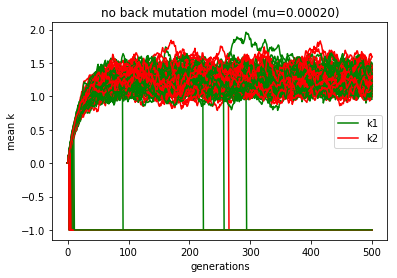

pop1 died 24 times
pop2 died 83 times


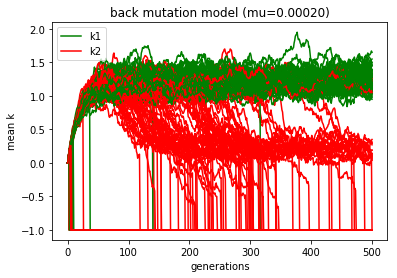

pop1 died 24 times
pop2 died 22 times


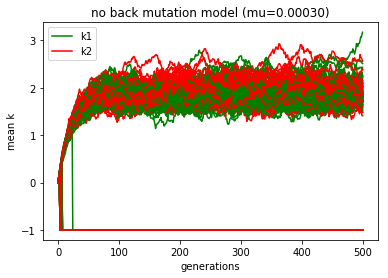

pop1 died 19 times
pop2 died 78 times


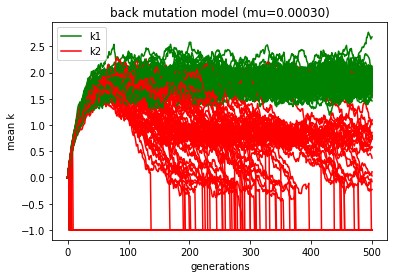

pop1 died 5 times
pop2 died 17 times


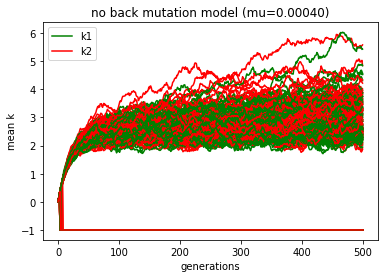

pop1 died 12 times
pop2 died 59 times


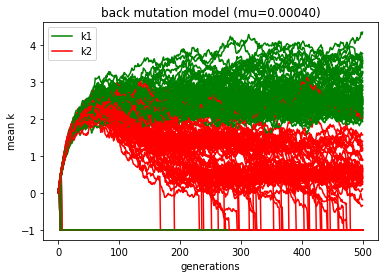

pop1 died 13 times
pop2 died 12 times


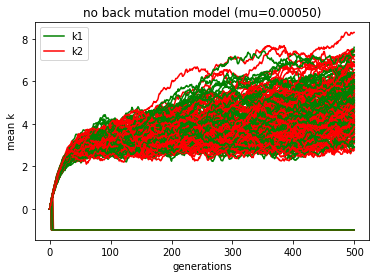

pop1 died 14 times
pop2 died 45 times


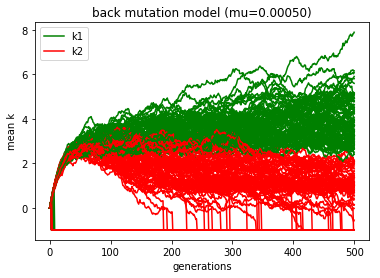

pop1 died 10 times
pop2 died 7 times


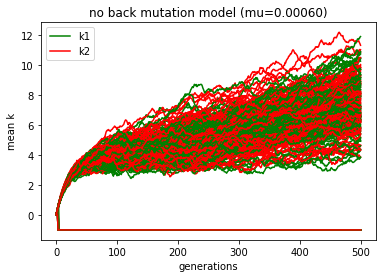

pop1 died 15 times
pop2 died 32 times


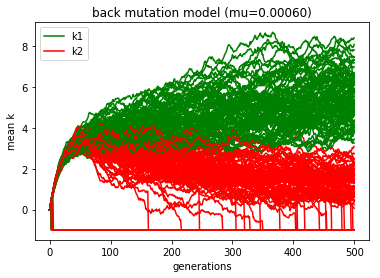

pop1 died 11 times
pop2 died 17 times


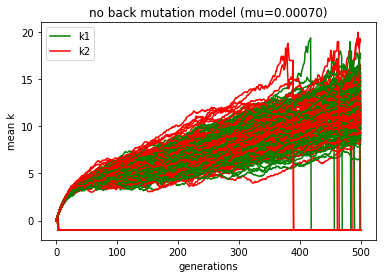

pop1 died 5 times
pop2 died 14 times


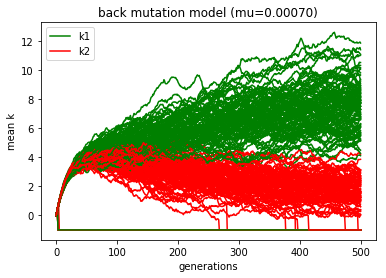

pop1 died 46 times
pop2 died 62 times


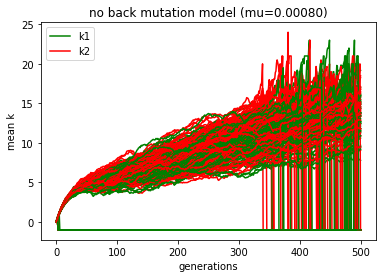

pop1 died 5 times
pop2 died 4 times


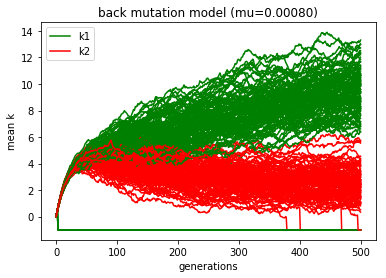

pop1 died 89 times
pop2 died 93 times


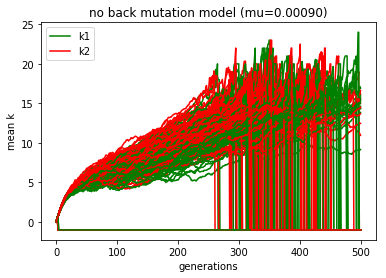

pop1 died 15 times
pop2 died 8 times


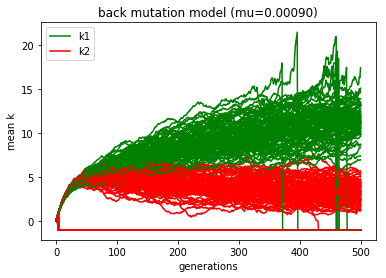

pop1 died 100 times
pop2 died 100 times


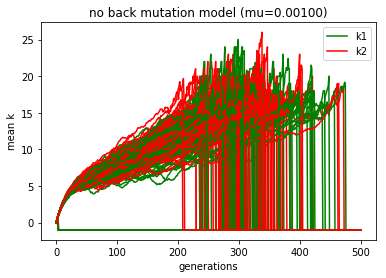

pop1 died 49 times
pop2 died 5 times


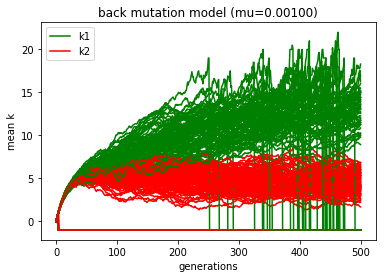

pop1 died 100 times
pop2 died 100 times


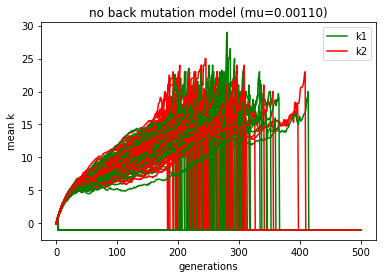

pop1 died 82 times
pop2 died 5 times


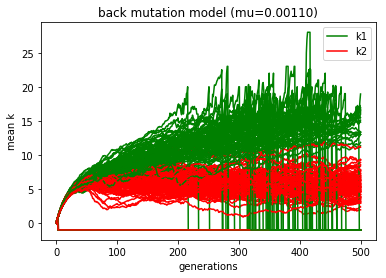

pop1 died 100 times
pop2 died 100 times


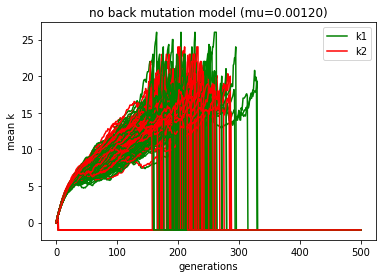

pop1 died 98 times
pop2 died 4 times


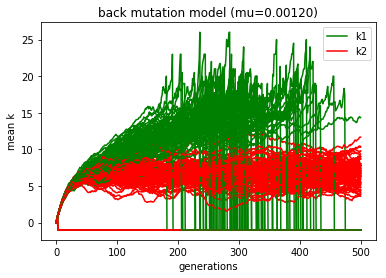

In [36]:
%matplotlib inline
pop = [1,2] # string 1 or 2
mu = [str(np.round(i,5))+'0' for i in np.linspace(0.0002,0.0012,11)]
mu[8]=mu[8]+'0'
for mut in ['0.00020']:
    strings = ['./back_test3/c1.2.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
               './back_test3/c1.2.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,1.00(0).csv'%(mut),
               './back_test3/c1.2.2s_0,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut),
               './back_test3/c1.2.2s_1,100,300,0.05,1000,1000,%s,500,0.00,0.50,0.00(0).csv'%(mut)]
    # no back
    data_a = pandas.read_csv(strings[0])
    data_b = pandas.read_csv(strings[2])
    reps = list(set(data_a['rep']))  
    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1] 
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    pop1dead = 0
    pop2dead = 0
    for i in reps:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.title('no back mutation model (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()

    # back
    data_a = pandas.read_csv(strings[1])
    data_b = pandas.read_csv(strings[3])

    data_a2 = data_a.loc[data_a['rep']==1]
    data_b2 = data_b.loc[data_b['rep']==1]
    plt.plot(list(data_a2['k1']),'g',label='k1')
    plt.plot(list(data_b2['k2']),'r',label='k2')
    plt.legend()
    plt.ylabel('mean k')
    plt.xlabel('generations')
    pop1dead = 0
    pop2dead = 0
    for i in reps[1::]:
        data_a2 = data_a.loc[data_a['rep']==i]
        data_b2 = data_b.loc[data_b['rep']==i]
        if -1 in list(data_a2['k1']):
            pop1dead += 1
        if -1 in list(data_b2['k2']):
            pop2dead += 1
        plt.plot(list(data_a2['k1']),'g')
        plt.plot(list(data_b2['k2']),'r')
        plt.title('back mutation model (mu=%s)'%(mut))
    print('pop1 died %d times'%(pop1dead))
    print('pop2 died %d times'%(pop2dead))
    plt.show()

In [8]:
## for back_test data
# change string of k2 data into integer list
pop = '1' # string 1 or 2
data = pandas.read_csv('./back_test/c1.2.2s_0,20,300,0.05,1000,1000,0.00060,500,0.00,0.50,1.00(0).csv')
for j in range(len(data['k'+pop])):
    data['k'+pop][j] = data['k'+pop][j].split('.')
    for i in range(len(data['k'+pop][j])):
        if data['k'+pop][j][i] != "'NA'": 
            data['k'+pop][j][i] = int(data['k'+pop][j][i])

%matplotlib inline

data2 = data.loc[data['rep']==1]
plt.plot(data2['pop'+pop])
plt.show()
for i in range(len(data2['k'+pop])):
    plt.figure(i)
    print('gen%d'%(i+1))
    print('pop#=%d'%(data2['pop'+pop][i]))
    plt.ylim((0,1100))
    plt.hist(data2['k'+pop][i],range=(0,20))
    plt.show()

/home/hyunseok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


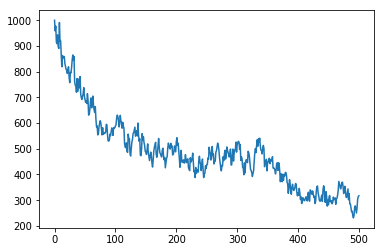

gen1
pop#=1000


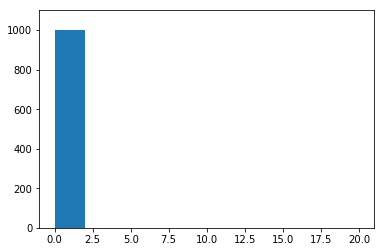

gen2
pop#=959


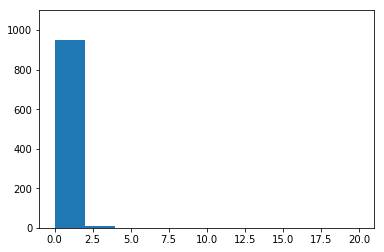

gen3
pop#=977


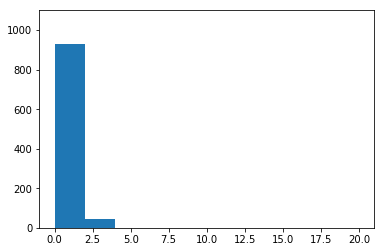

gen4
pop#=915


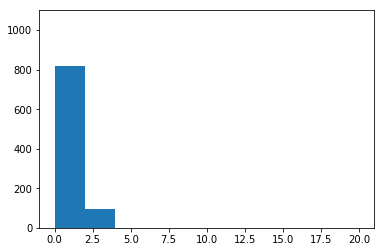

gen5
pop#=909


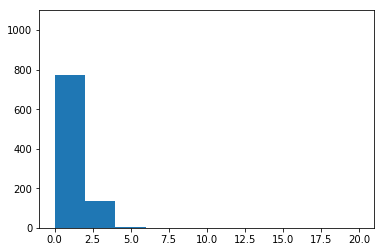

gen6
pop#=943


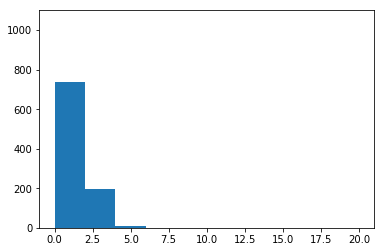

gen7
pop#=898


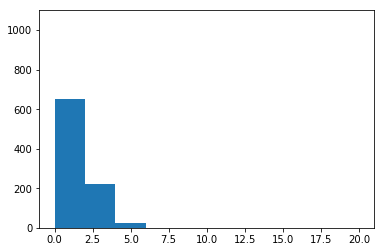

gen8
pop#=890


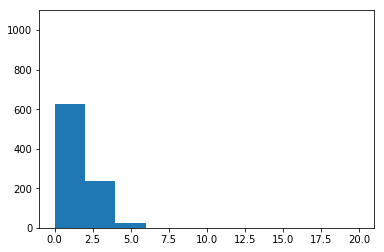

gen9
pop#=991


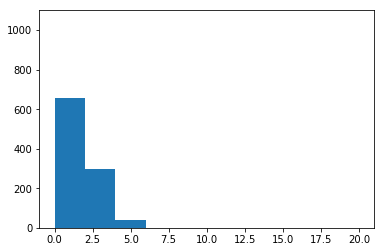

gen10
pop#=919


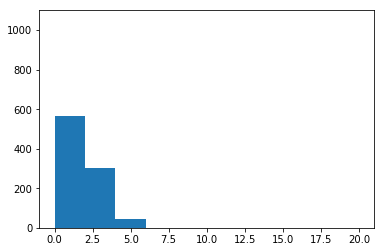

gen11
pop#=920


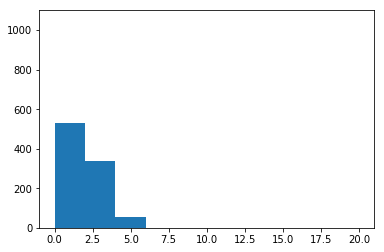

gen12
pop#=864


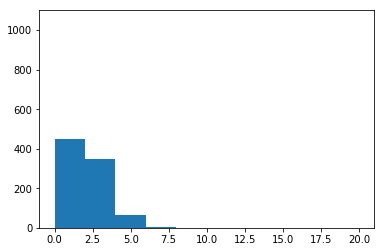

gen13
pop#=819


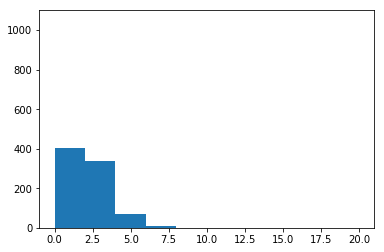

gen14
pop#=863


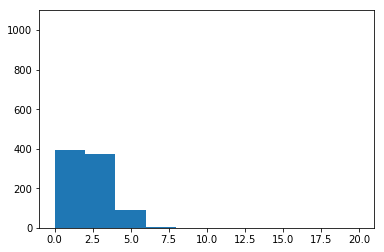

gen15
pop#=853


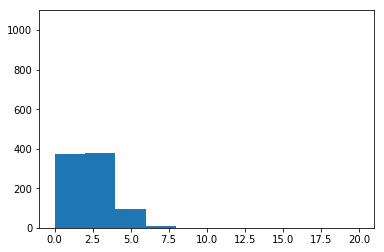

gen16
pop#=858


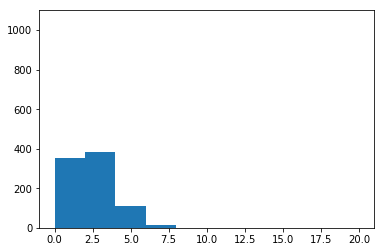

gen17
pop#=859


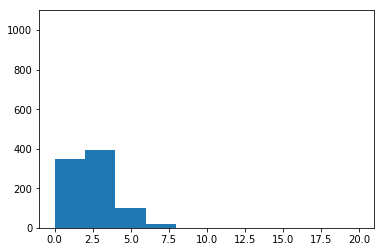

gen18
pop#=832


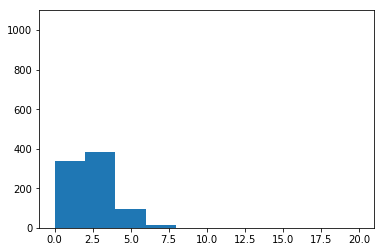

gen19
pop#=821


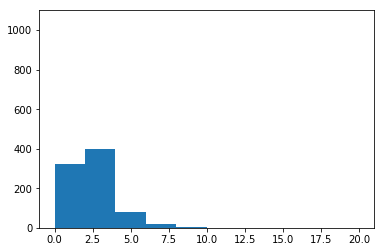

gen20
pop#=808


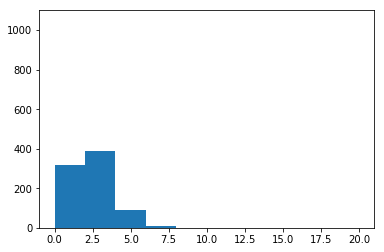

gen21
pop#=806


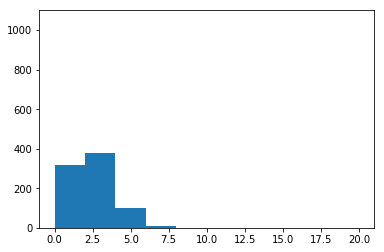

gen22
pop#=793


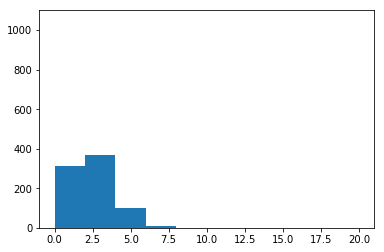

gen23
pop#=810


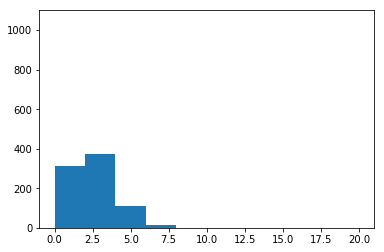

gen24
pop#=819


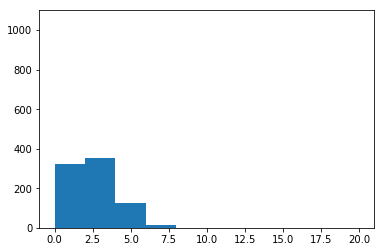

gen25
pop#=777


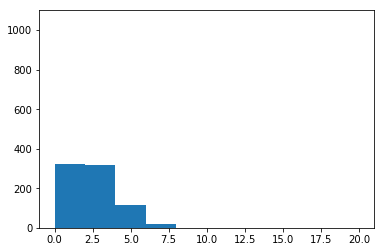

gen26
pop#=757


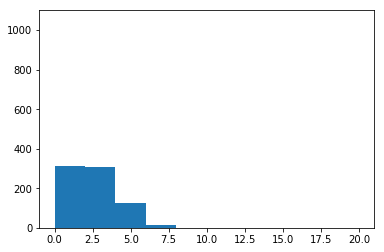

gen27
pop#=797


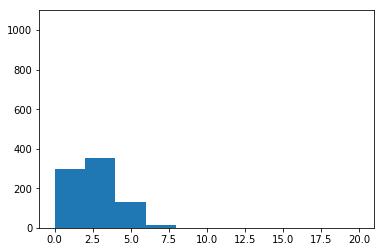

gen28
pop#=795


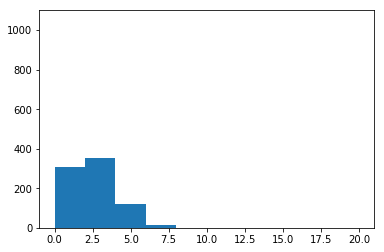

gen29
pop#=816


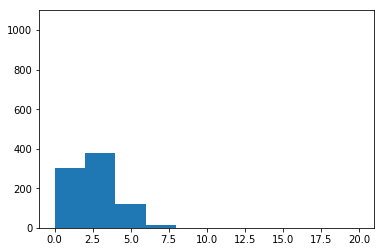

gen30
pop#=846


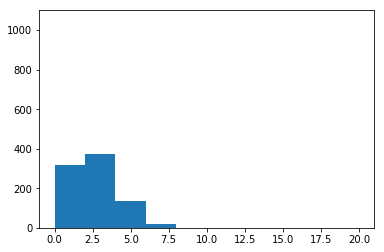

gen31
pop#=865


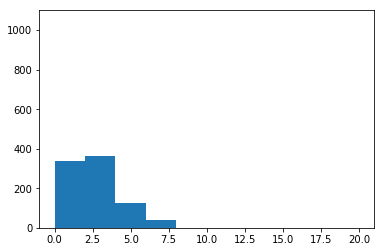

gen32
pop#=844


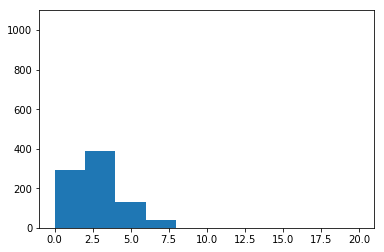

gen33
pop#=859


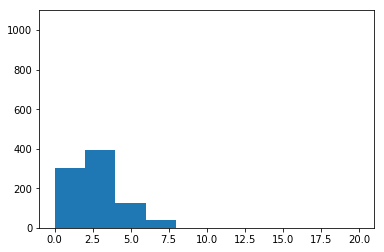

gen34
pop#=762


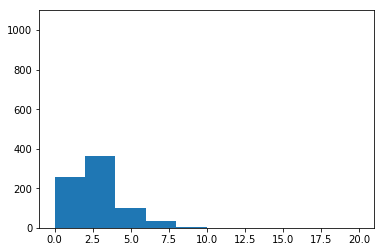

gen35
pop#=747


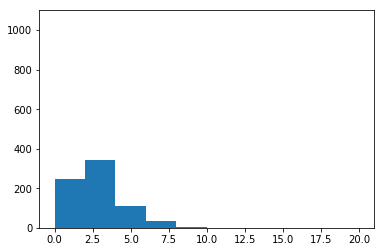

gen36
pop#=745


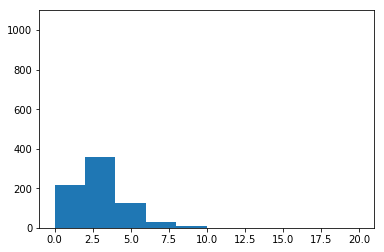

gen37
pop#=720


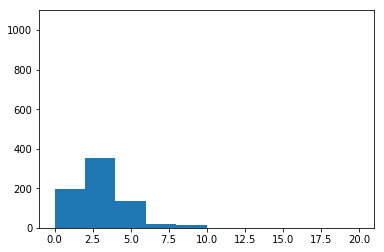

gen38
pop#=773


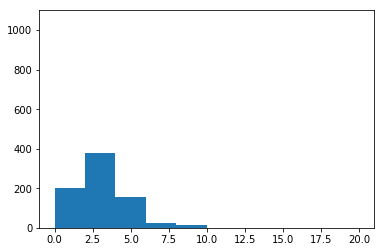

gen39
pop#=723


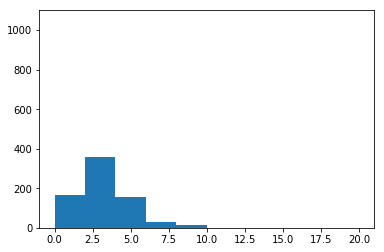

gen40
pop#=771


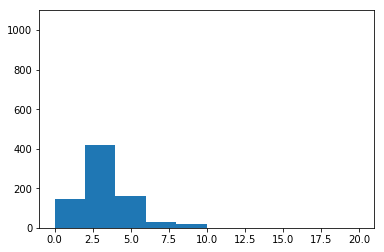

gen41
pop#=766


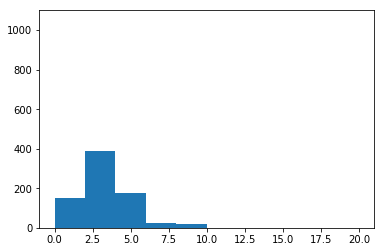

gen42
pop#=737


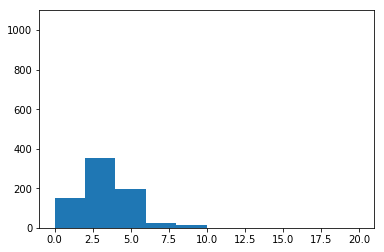

gen43
pop#=781


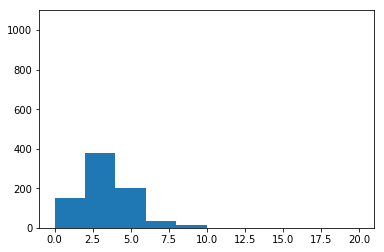

gen44
pop#=711


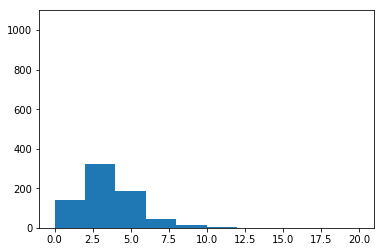

gen45
pop#=699


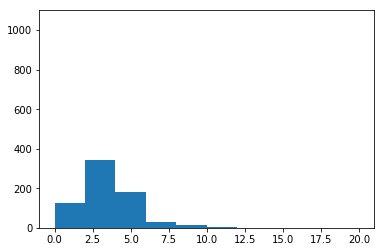

gen46
pop#=692


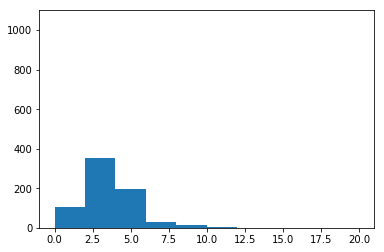

gen47
pop#=705


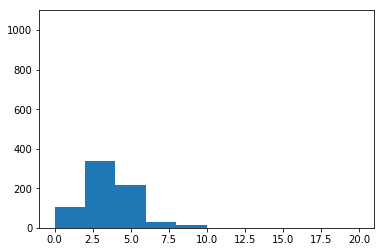

gen48
pop#=714


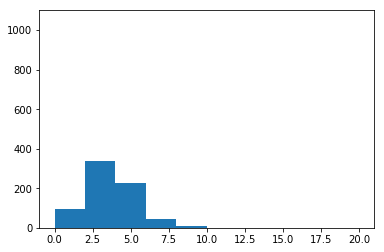

gen49
pop#=738


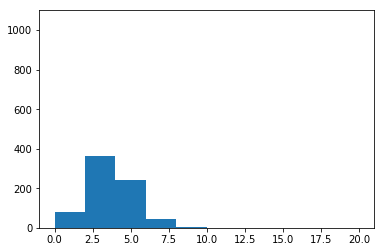

gen50
pop#=704


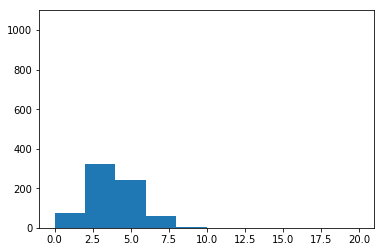

gen51
pop#=693


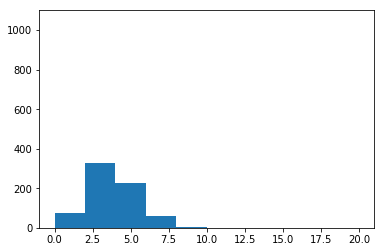

gen52
pop#=681


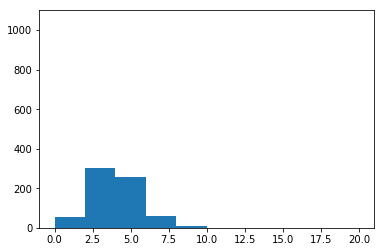

gen53
pop#=684


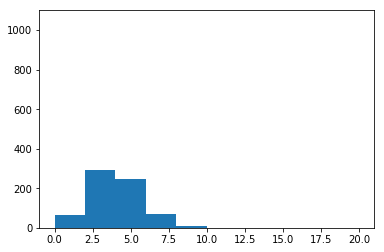

gen54
pop#=676


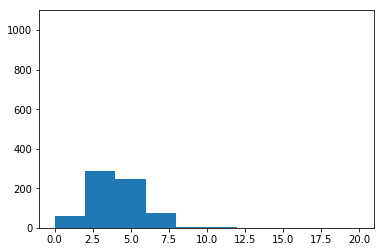

gen55
pop#=714


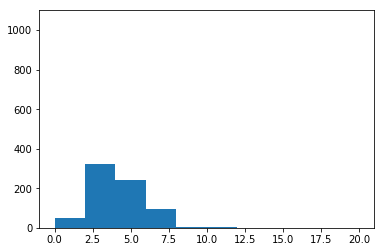

gen56
pop#=690


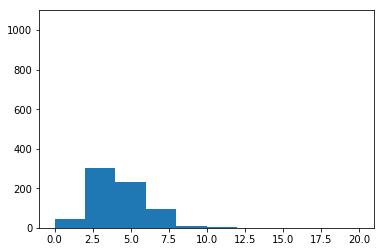

gen57
pop#=631


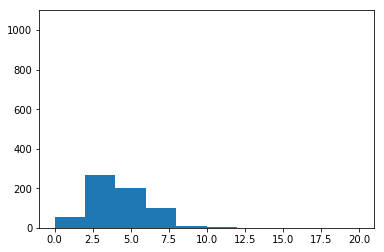

gen58
pop#=633


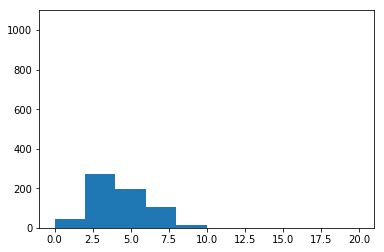

gen59
pop#=654


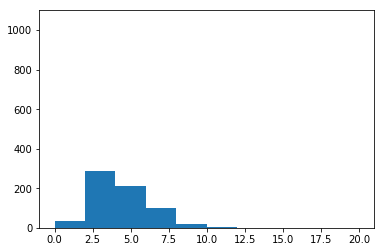

gen60
pop#=684


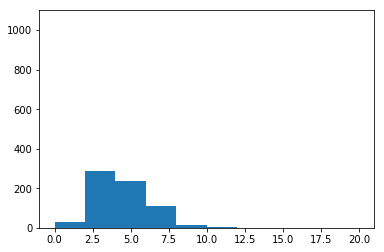

gen61
pop#=698


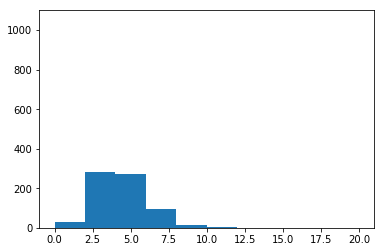

gen62
pop#=659


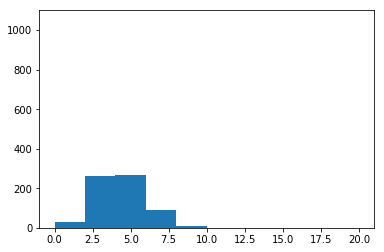

gen63
pop#=689


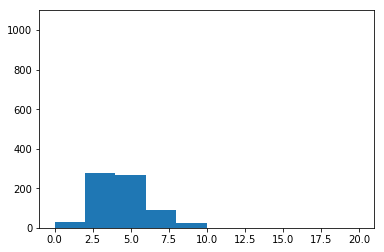

gen64
pop#=705


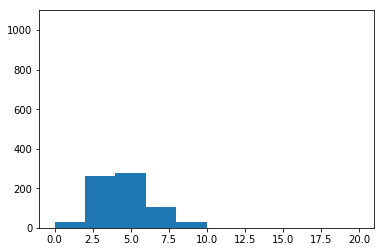

gen65
pop#=670


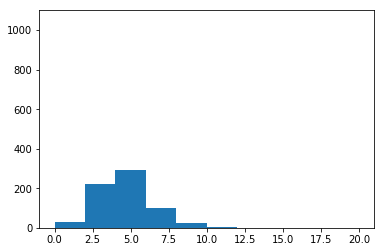

gen66
pop#=651


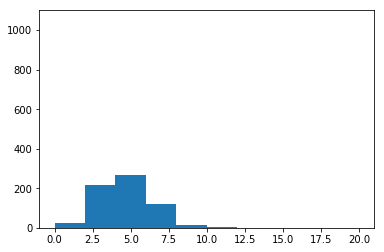

gen67
pop#=641


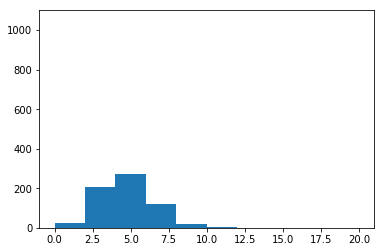

gen68
pop#=664


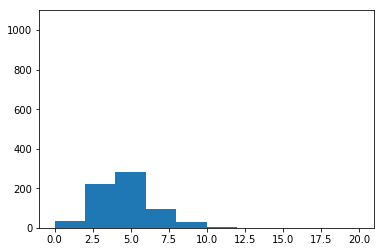

gen69
pop#=614


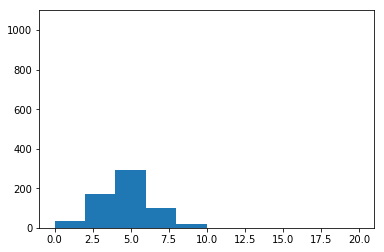

gen70
pop#=585


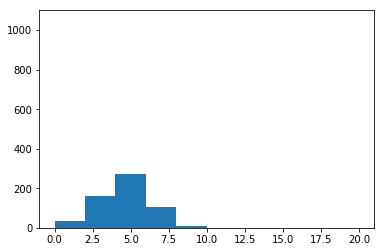

gen71
pop#=589


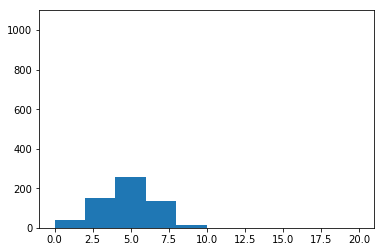

gen72
pop#=554


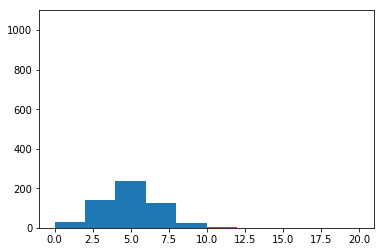

gen73
pop#=557


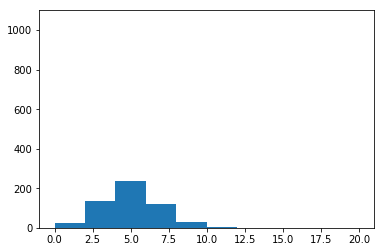

gen74
pop#=584


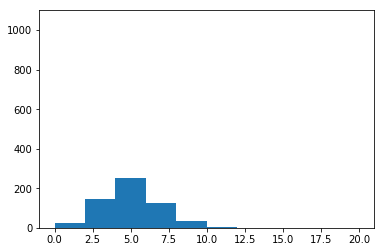

gen75
pop#=599


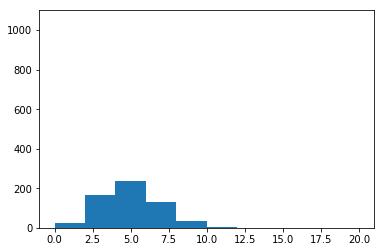

gen76
pop#=609


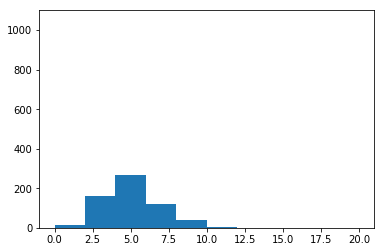

gen77
pop#=601


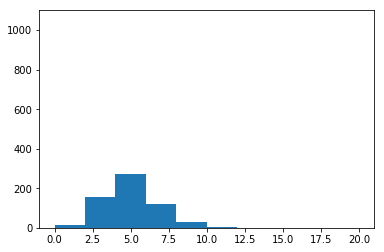

gen78
pop#=580


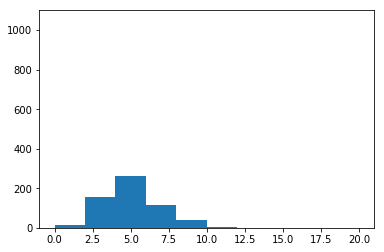

gen79
pop#=554


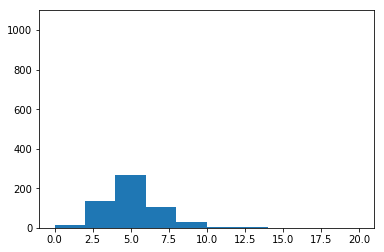

gen80
pop#=582


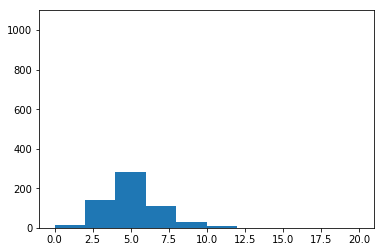

gen81
pop#=556


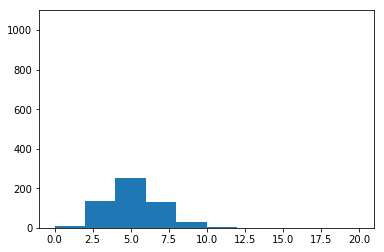

gen82
pop#=558


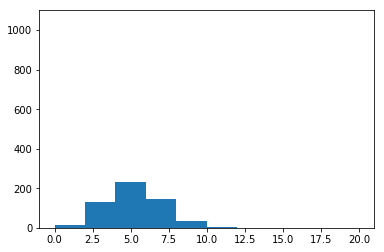

gen83
pop#=563


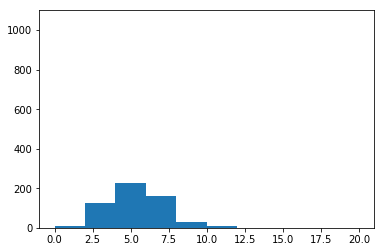

gen84
pop#=561


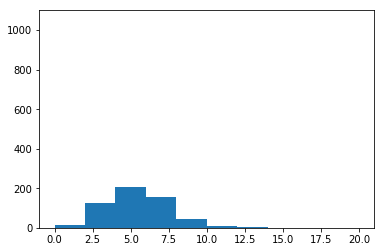

gen85
pop#=565


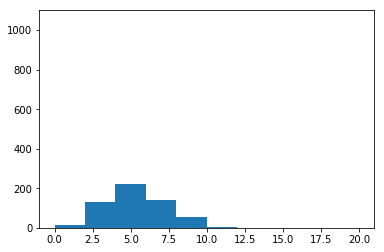

gen86
pop#=595


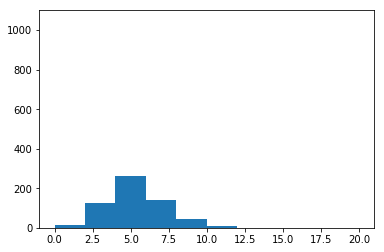

gen87
pop#=593


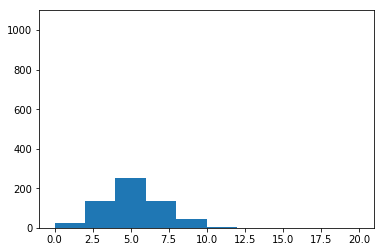

gen88
pop#=555


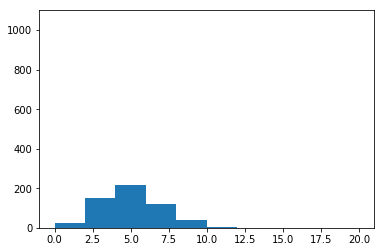

gen89
pop#=531


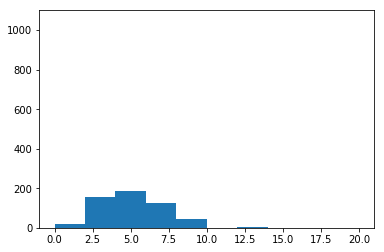

gen90
pop#=530


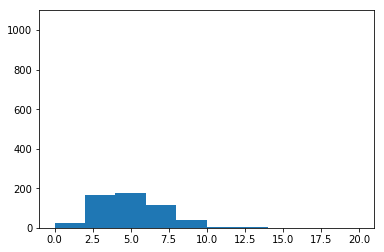

gen91
pop#=533


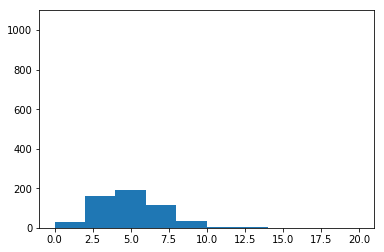

gen92
pop#=557


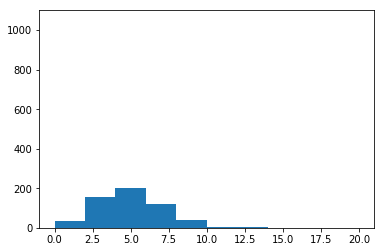

gen93
pop#=551


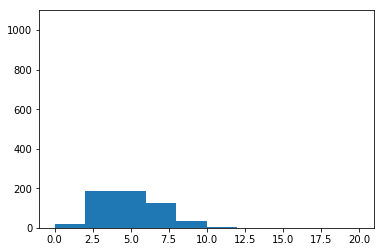

gen94
pop#=565


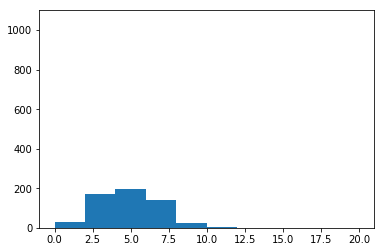

gen95
pop#=581


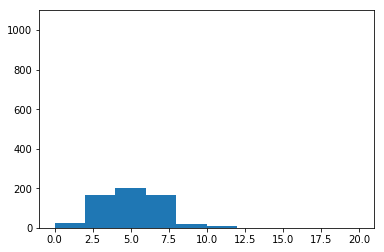

gen96
pop#=574


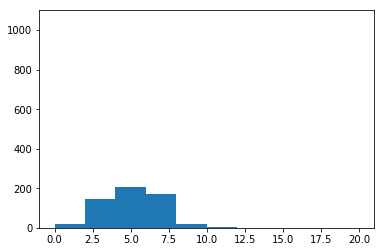

gen97
pop#=552


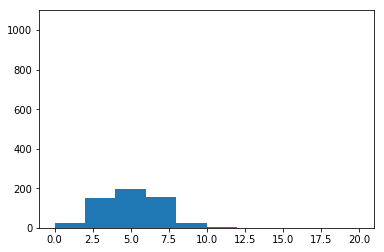

gen98
pop#=582


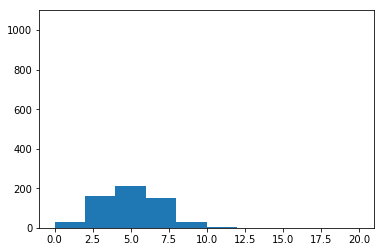

gen99
pop#=580


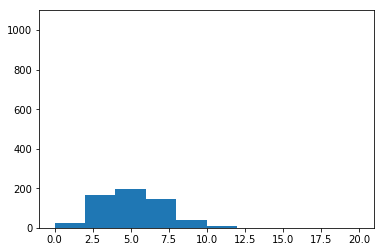

gen100
pop#=582


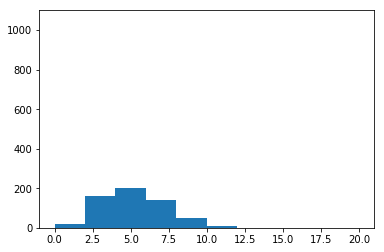

gen101
pop#=589


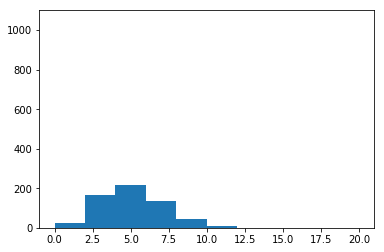

gen102
pop#=593


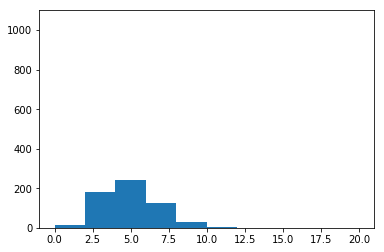

gen103
pop#=619


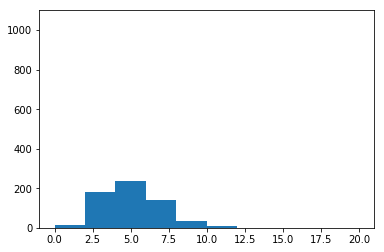

gen104
pop#=631


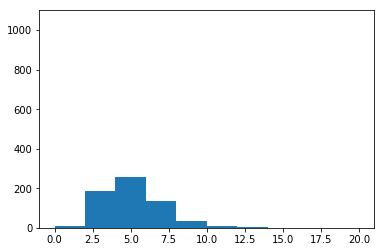

gen105
pop#=626


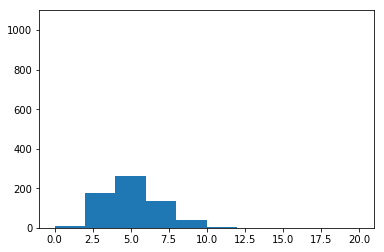

gen106
pop#=611


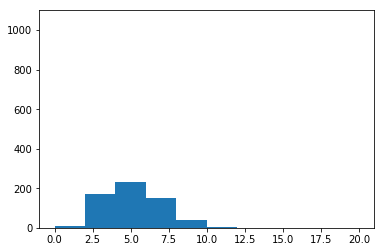

gen107
pop#=585


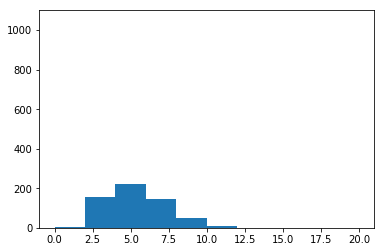

gen108
pop#=596


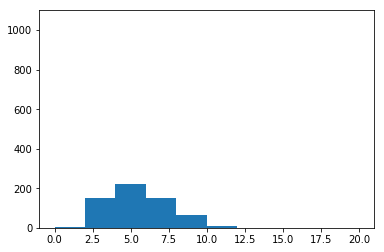

gen109
pop#=630


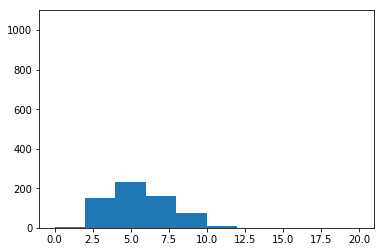

gen110
pop#=608


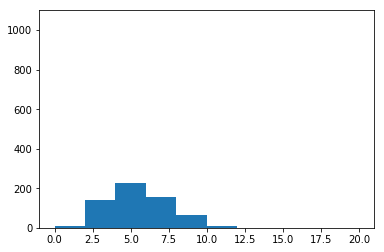

gen111
pop#=603


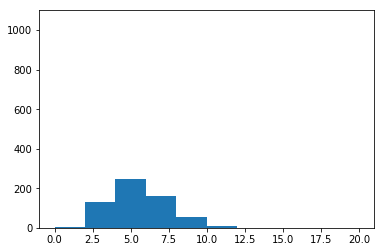

gen112
pop#=580


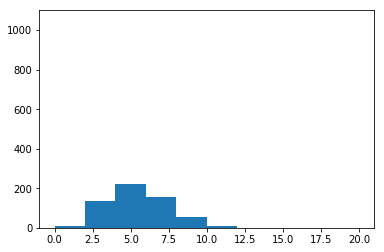

gen113
pop#=603


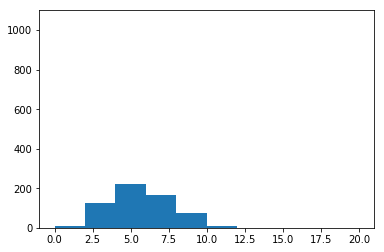

gen114
pop#=588


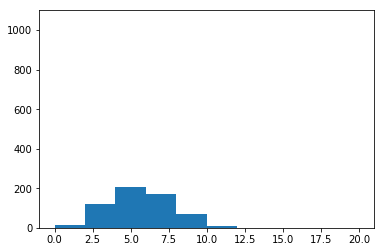

gen115
pop#=581


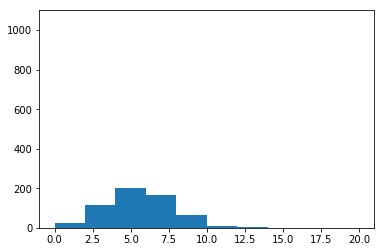

gen116
pop#=522


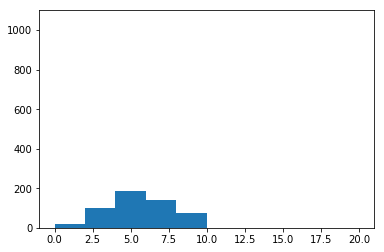

gen117
pop#=506


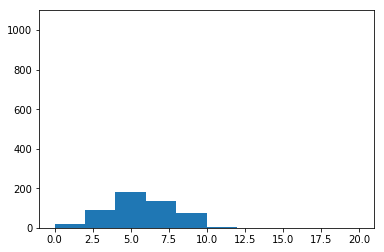

gen118
pop#=504


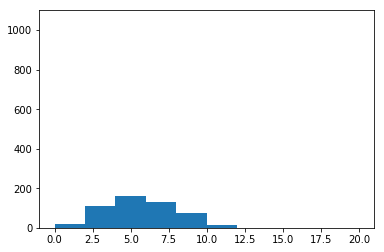

gen119
pop#=523


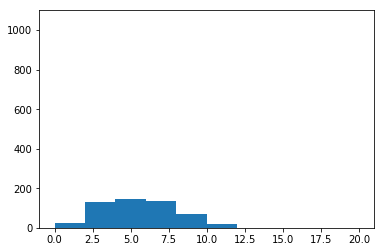

gen120
pop#=490


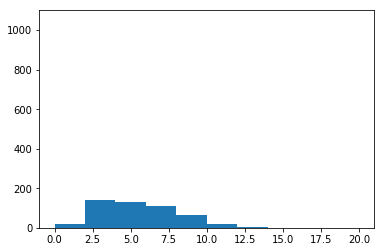

gen121
pop#=486


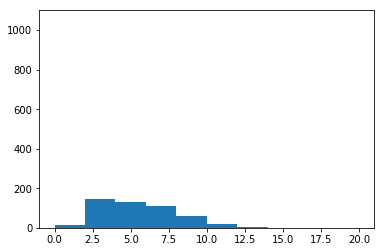

gen122
pop#=557


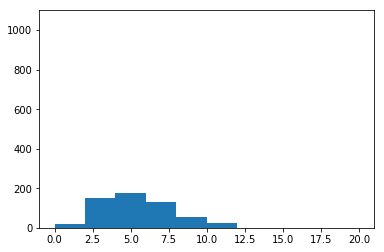

gen123
pop#=539


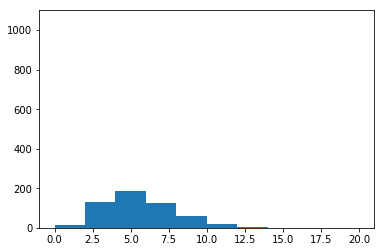

gen124
pop#=539


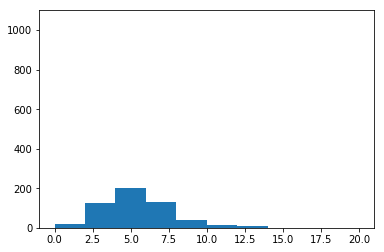

gen125
pop#=481


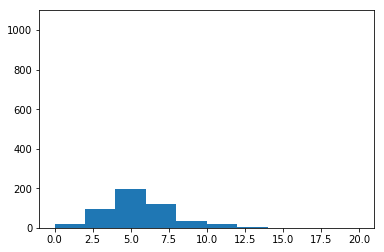

gen126
pop#=472


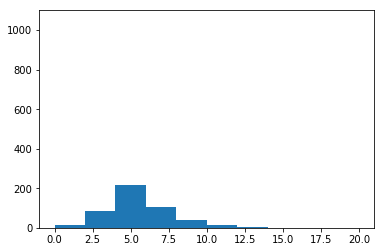

gen127
pop#=497


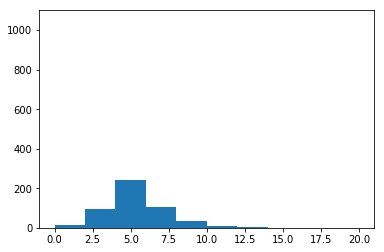

gen128
pop#=526


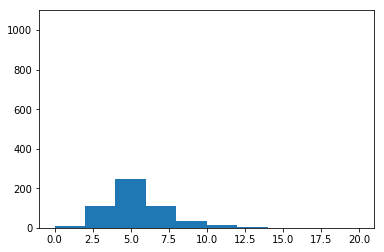

gen129
pop#=536


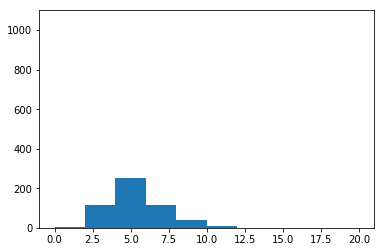

gen130
pop#=559


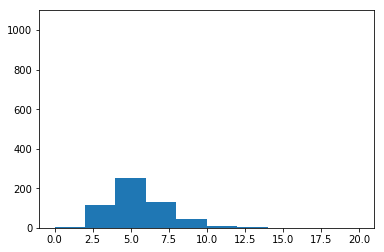

gen131
pop#=562


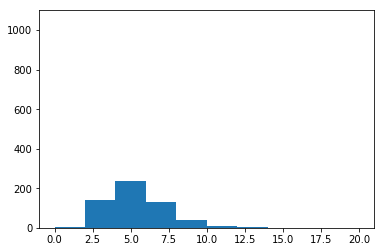

gen132
pop#=574


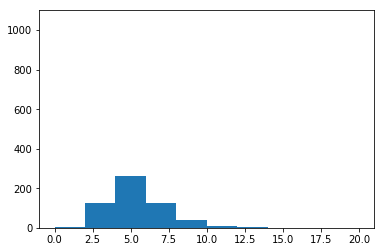

gen133
pop#=584


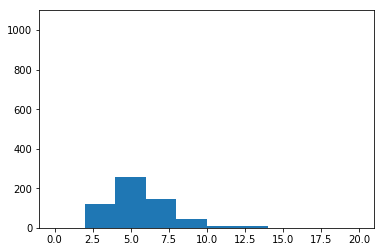

gen134
pop#=549


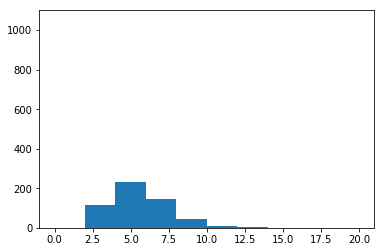

gen135
pop#=556


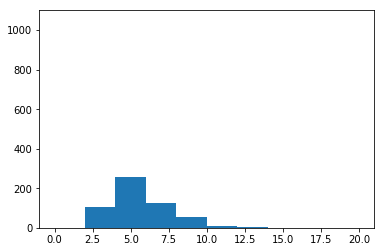

gen136
pop#=570


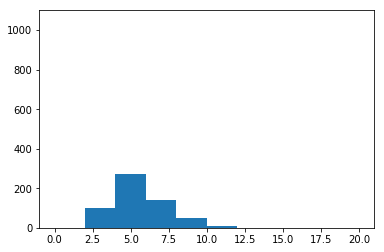

gen137
pop#=550


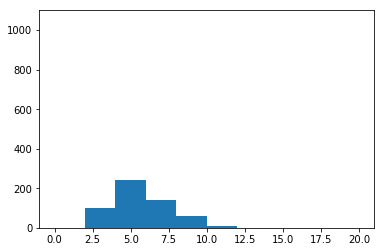

gen138
pop#=600


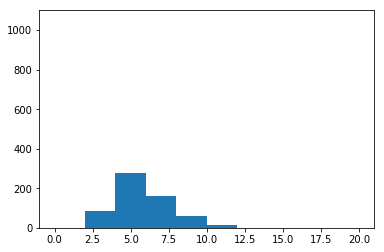

gen139
pop#=553


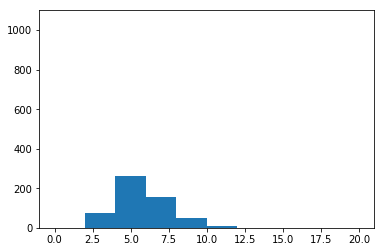

gen140
pop#=529


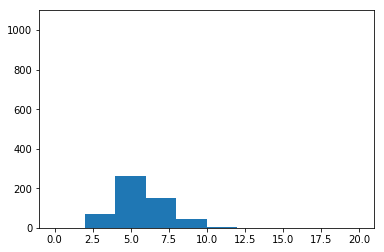

gen141
pop#=539


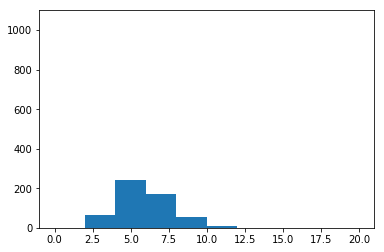

gen142
pop#=475


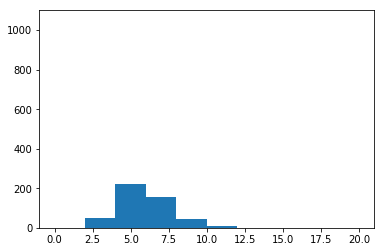

gen143
pop#=473


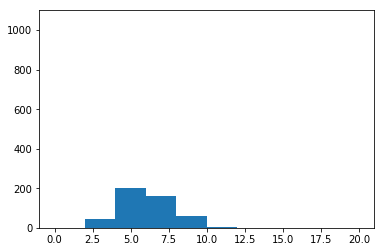

gen144
pop#=499


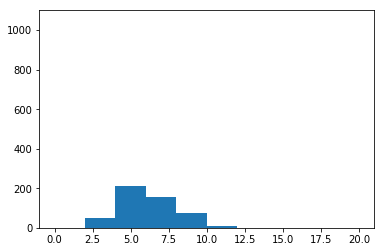

gen145
pop#=559


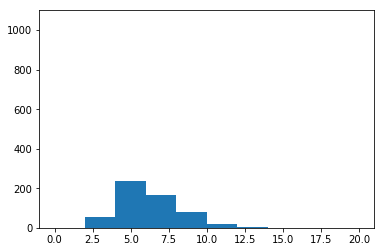

gen146
pop#=533


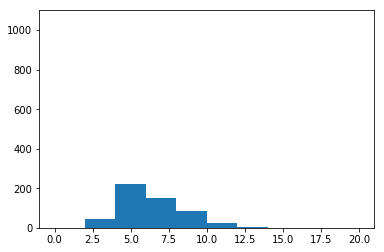

gen147
pop#=547


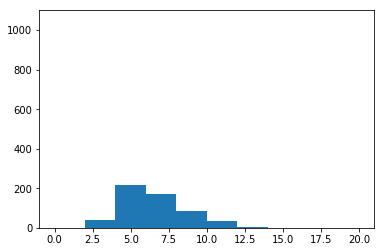

gen148
pop#=524


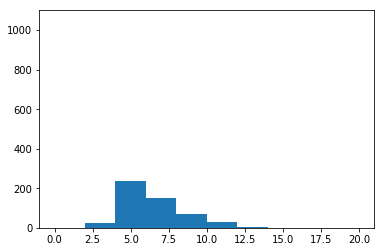

gen149
pop#=513


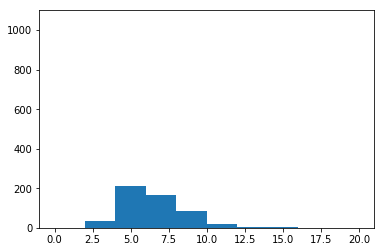

gen150
pop#=490


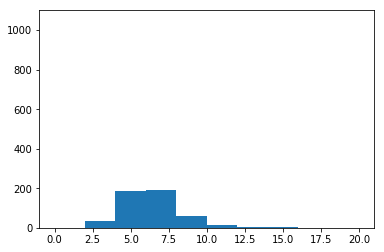

gen151
pop#=487


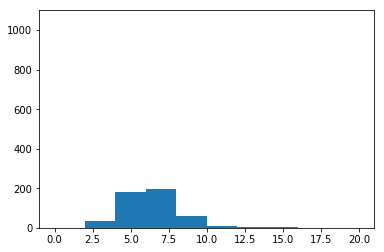

gen152
pop#=478


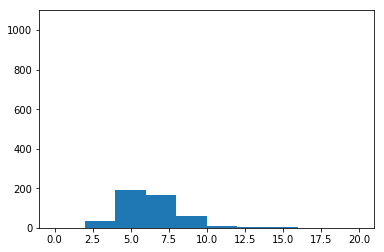

gen153
pop#=495


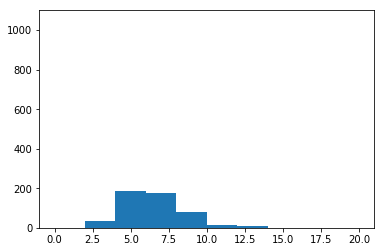

gen154
pop#=519


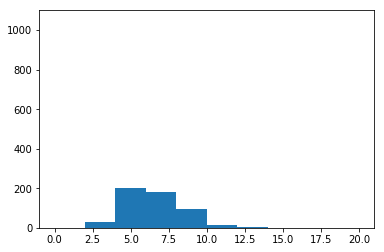

gen155
pop#=486


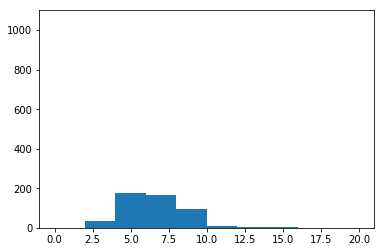

gen156
pop#=469


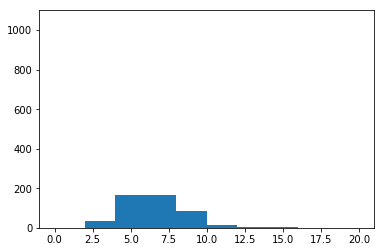

gen157
pop#=454


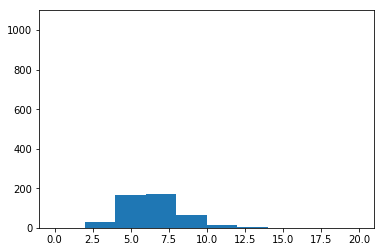

gen158
pop#=471


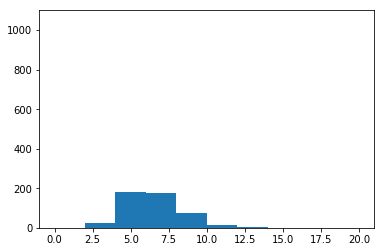

gen159
pop#=487


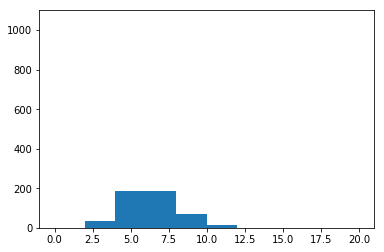

gen160
pop#=472


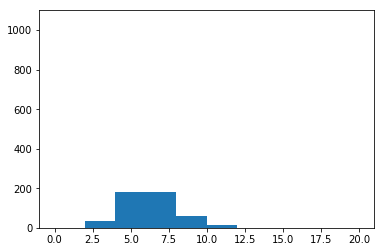

gen161
pop#=445


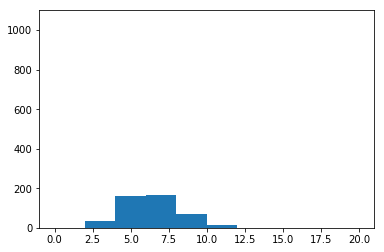

gen162
pop#=429


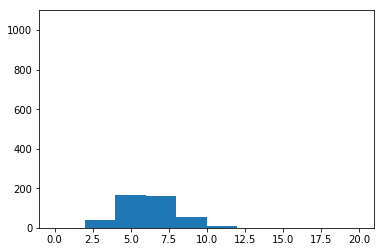

gen163
pop#=456


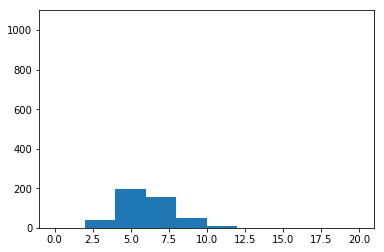

gen164
pop#=490


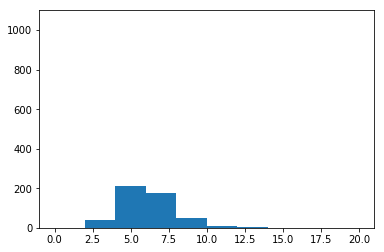

gen165
pop#=506


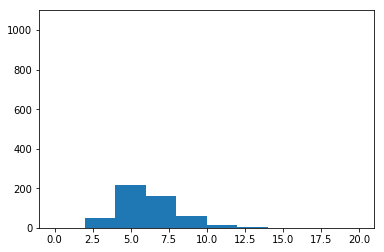

gen166
pop#=515


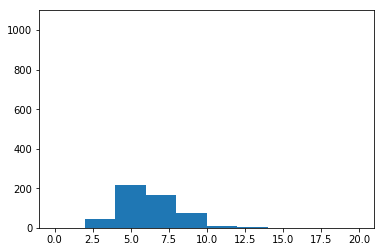

gen167
pop#=525


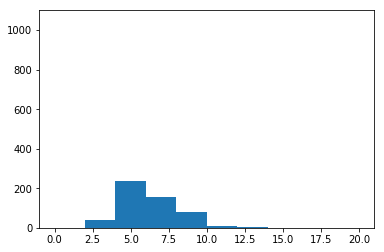

gen168
pop#=479


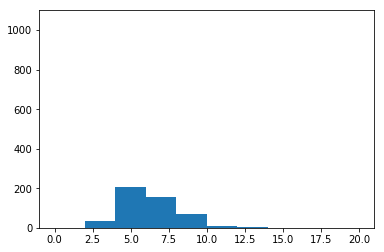

gen169
pop#=467


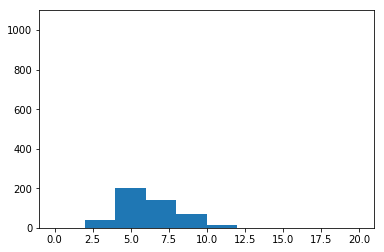

gen170
pop#=481


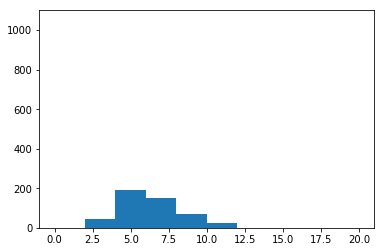

gen171
pop#=513


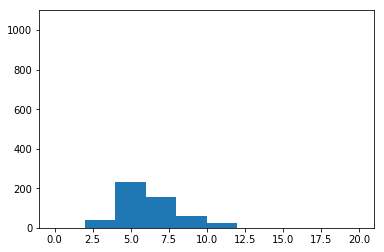

gen172
pop#=540


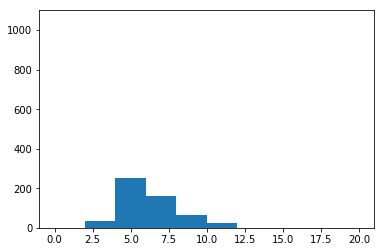

gen173
pop#=507


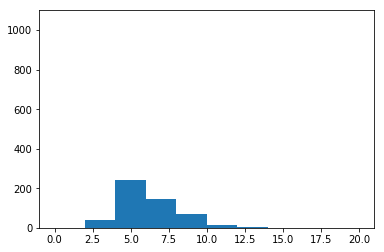

gen174
pop#=485


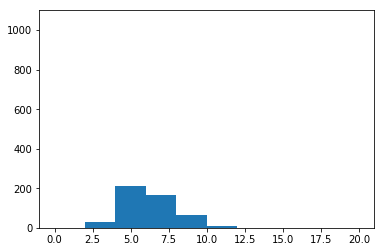

gen175
pop#=480


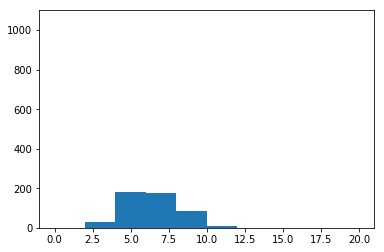

gen176
pop#=472


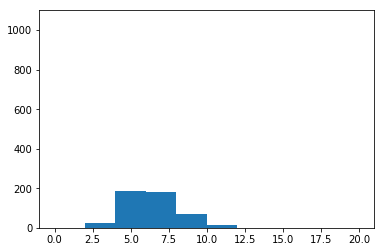

gen177
pop#=468


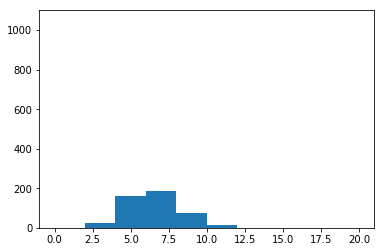

gen178
pop#=494


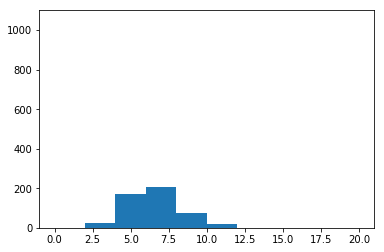

gen179
pop#=502


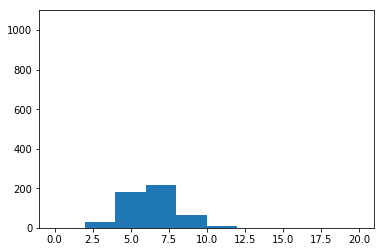

gen180
pop#=475


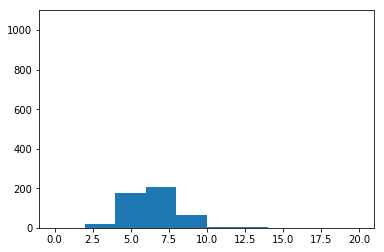

gen181
pop#=457


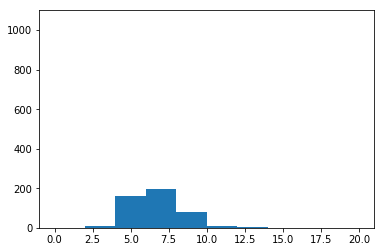

gen182
pop#=466


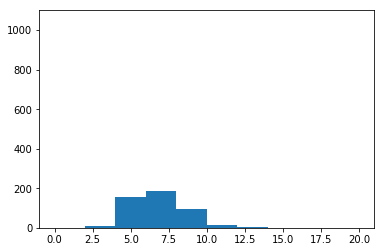

gen183
pop#=426


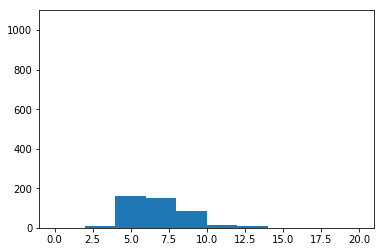

gen184
pop#=445


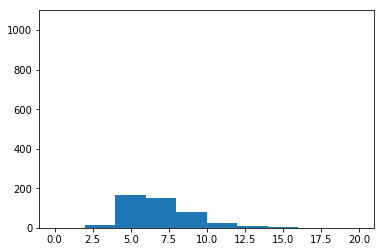

gen185
pop#=463


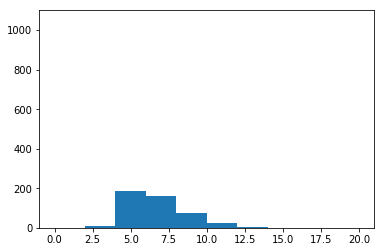

gen186
pop#=469


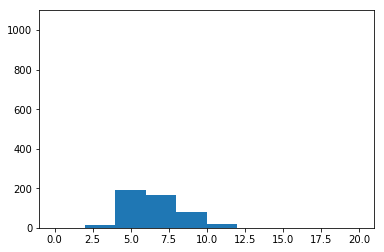

gen187
pop#=503


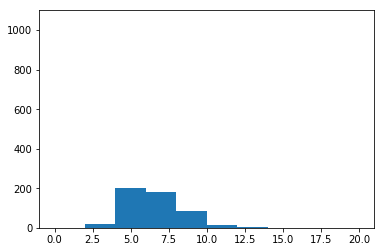

gen188
pop#=522


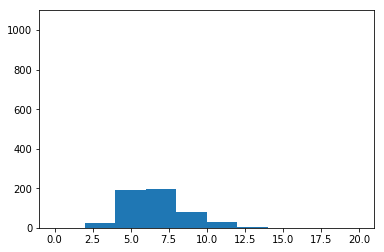

gen189
pop#=514


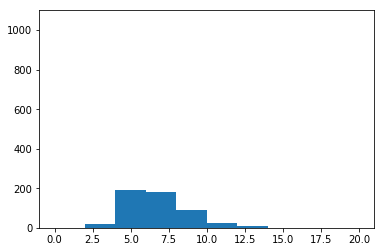

gen190
pop#=502


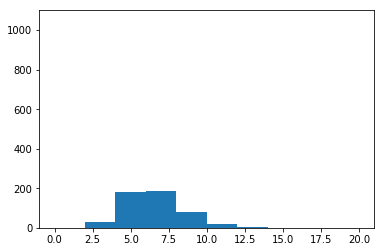

gen191
pop#=499


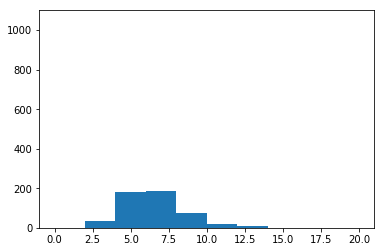

gen192
pop#=521


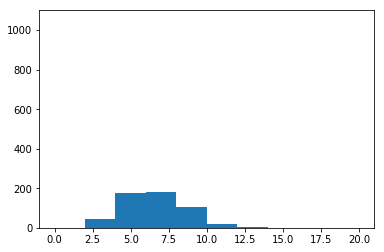

gen193
pop#=508


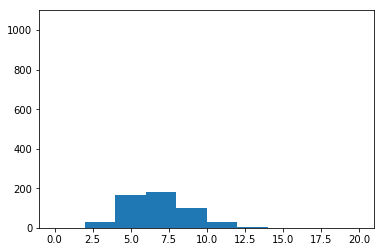

gen194
pop#=511


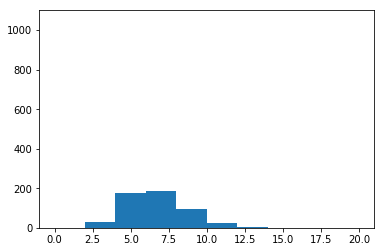

gen195
pop#=476


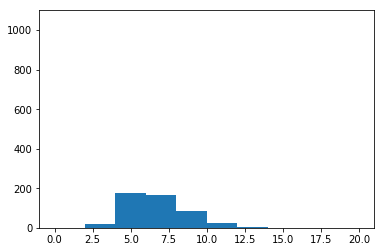

gen196
pop#=478


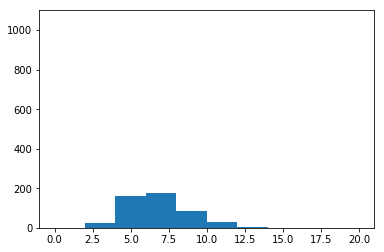

gen197
pop#=488


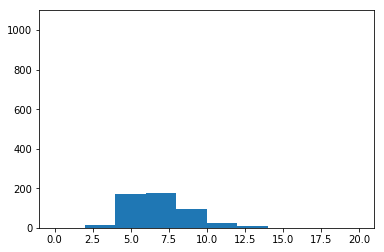

gen198
pop#=511


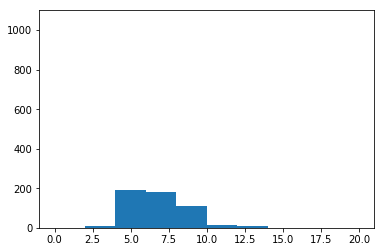

gen199
pop#=500


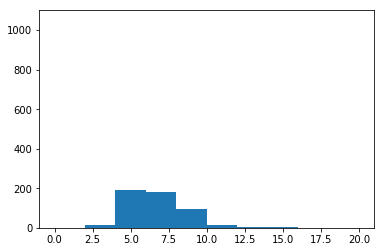

gen200
pop#=488


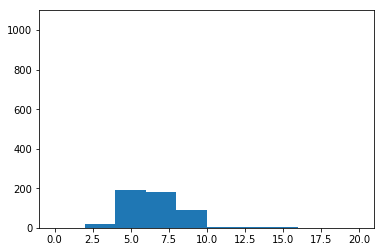

gen201
pop#=527


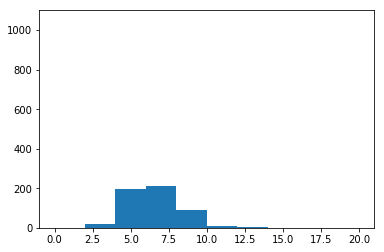

gen202
pop#=543


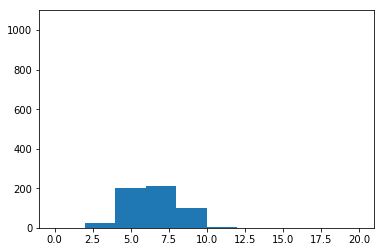

gen203
pop#=513


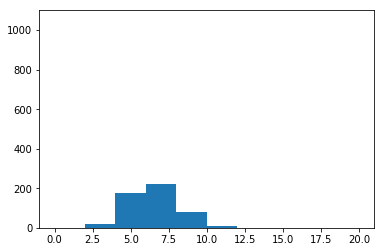

gen204
pop#=522


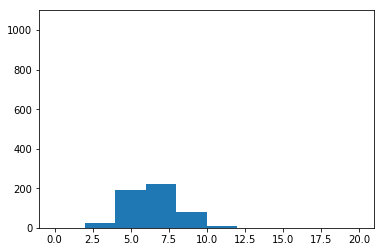

gen205
pop#=493


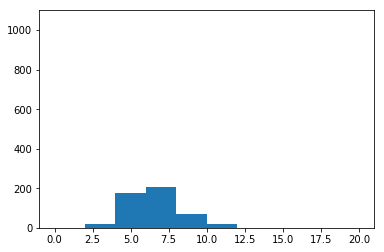

gen206
pop#=463


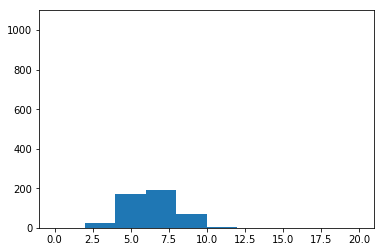

gen207
pop#=428


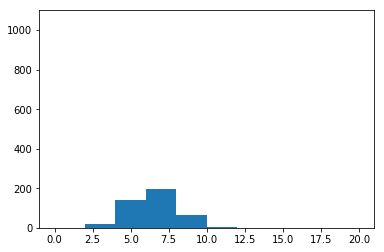

gen208
pop#=453


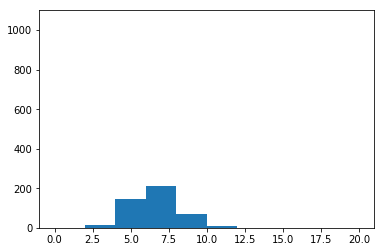

gen209
pop#=494


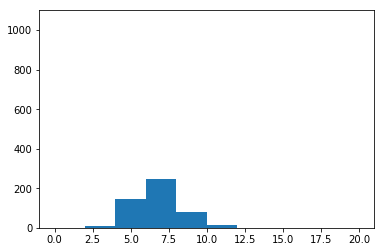

gen210
pop#=454


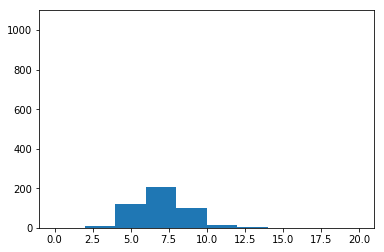

gen211
pop#=447


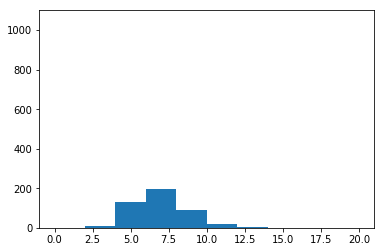

gen212
pop#=454


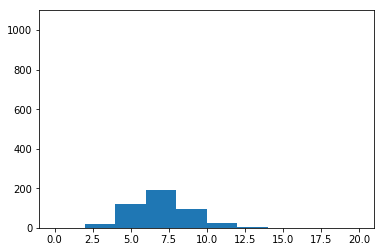

gen213
pop#=457


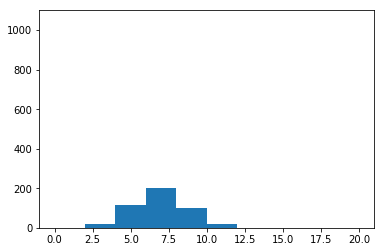

gen214
pop#=444


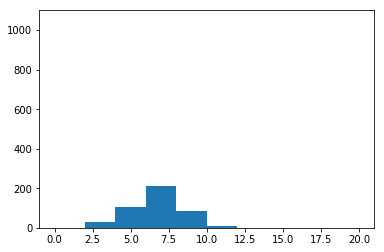

gen215
pop#=447


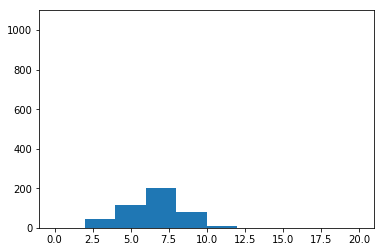

gen216
pop#=477


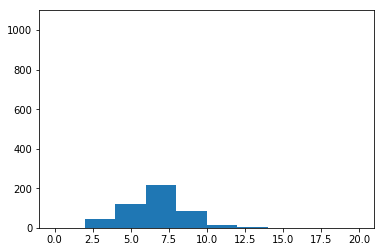

gen217
pop#=458


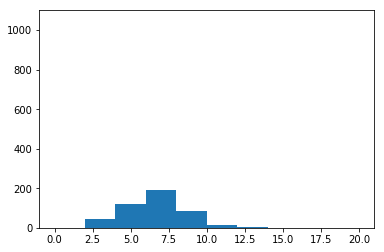

gen218
pop#=446


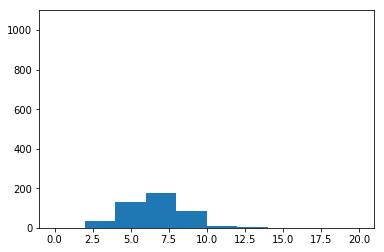

gen219
pop#=458


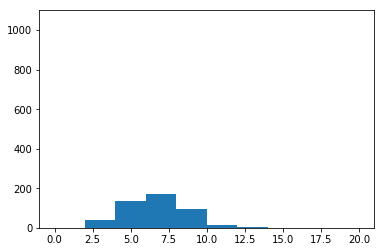

gen220
pop#=461


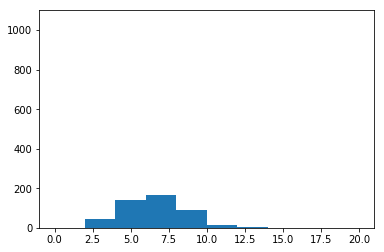

gen221
pop#=427


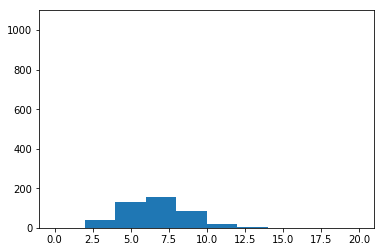

gen222
pop#=420


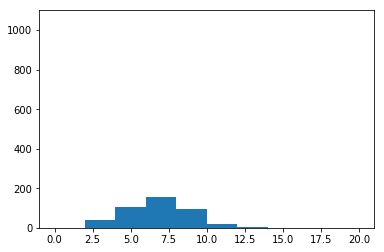

gen223
pop#=415


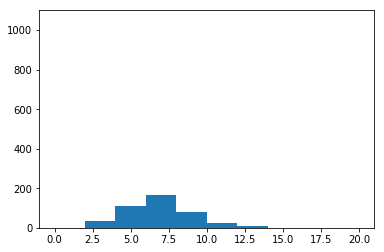

gen224
pop#=465


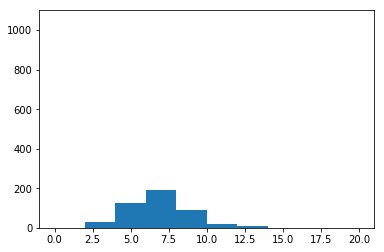

gen225
pop#=448


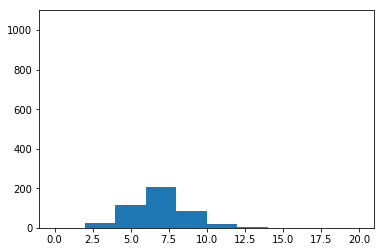

gen226
pop#=454


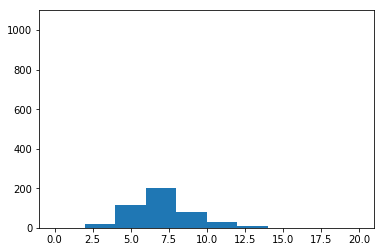

gen227
pop#=463


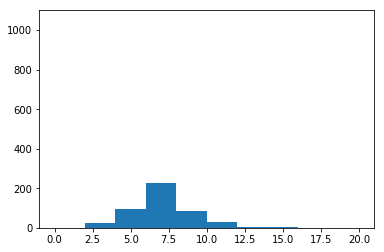

gen228
pop#=483


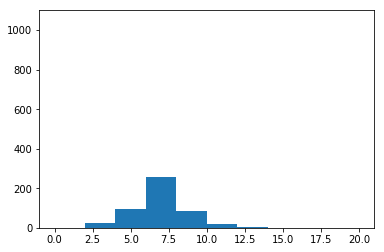

gen229
pop#=444


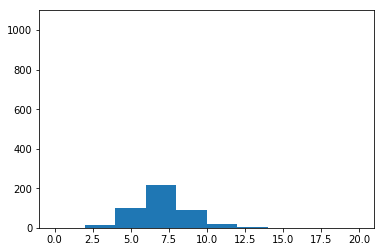

gen230
pop#=411


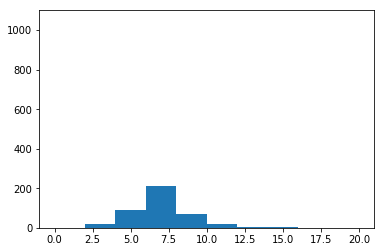

gen231
pop#=413


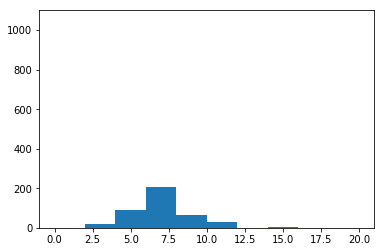

gen232
pop#=388


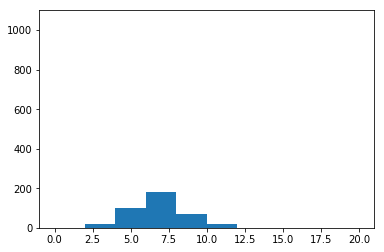

gen233
pop#=427


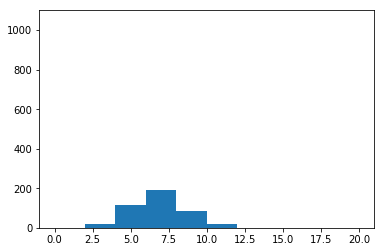

gen234
pop#=404


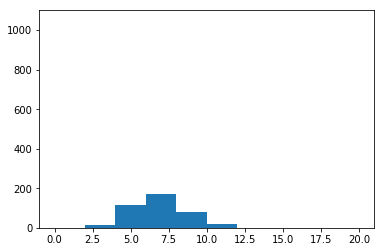

gen235
pop#=419


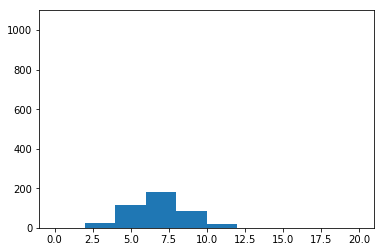

gen236
pop#=413


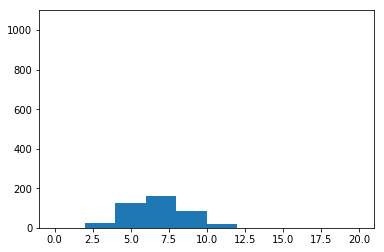

gen237
pop#=409


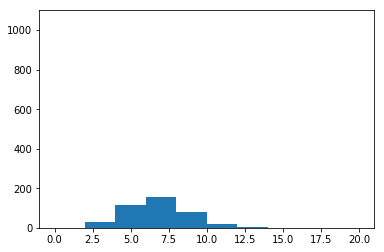

gen238
pop#=455


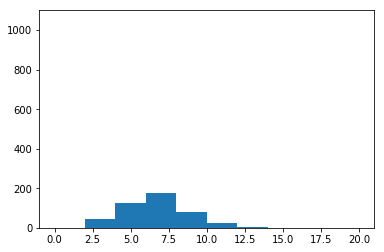

gen239
pop#=471


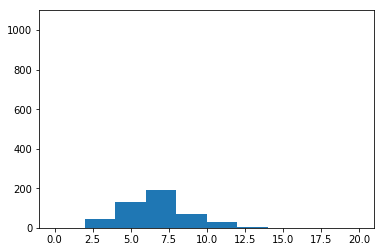

gen240
pop#=447


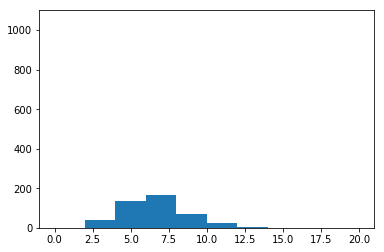

gen241
pop#=440


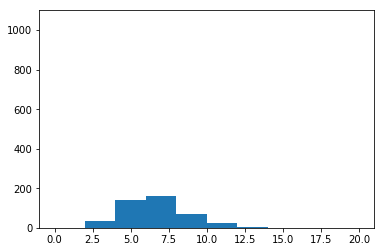

gen242
pop#=415


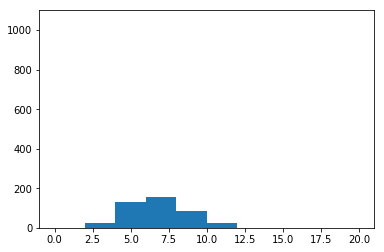

gen243
pop#=444


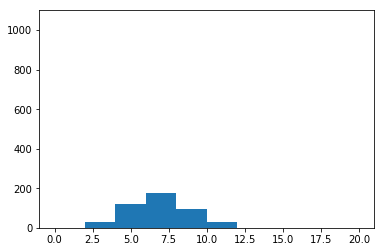

gen244
pop#=460


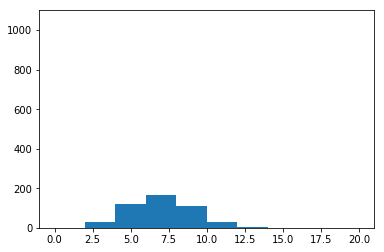

gen245
pop#=420


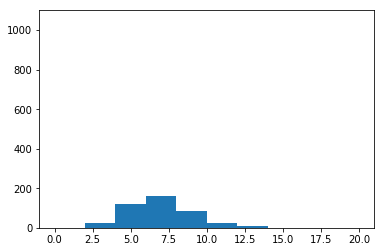

gen246
pop#=388


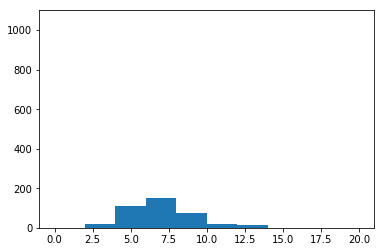

gen247
pop#=401


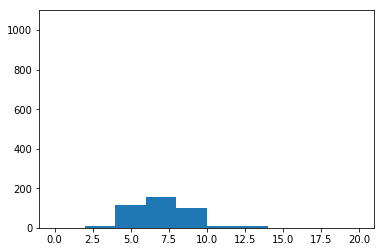

gen248
pop#=405


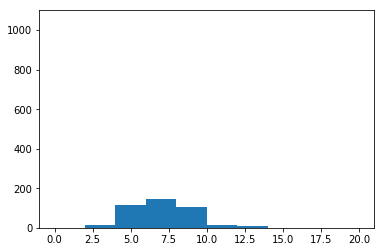

gen249
pop#=434


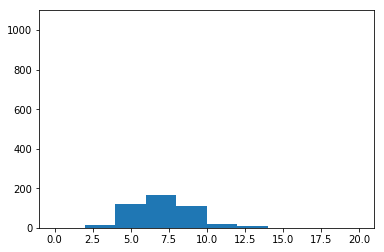

gen250
pop#=423


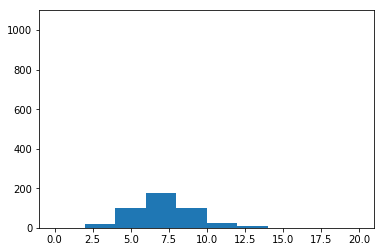

gen251
pop#=438


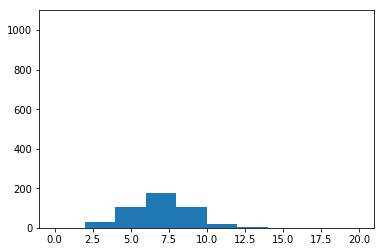

gen252
pop#=439


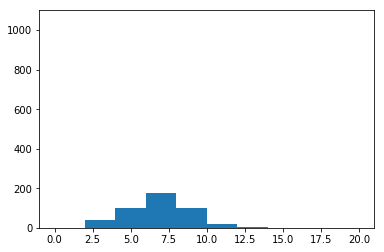

gen253
pop#=464


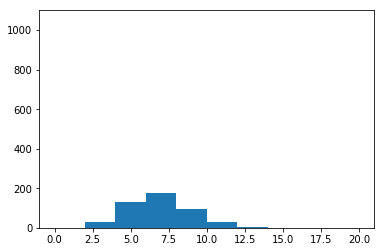

gen254
pop#=460


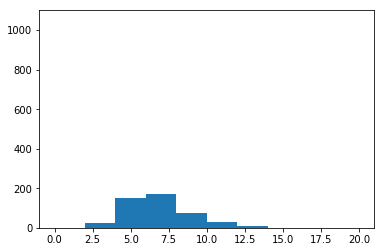

gen255
pop#=506


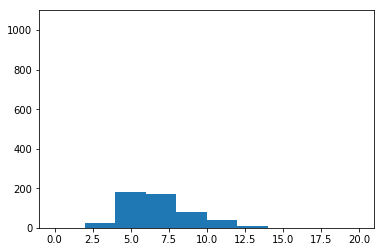

gen256
pop#=490


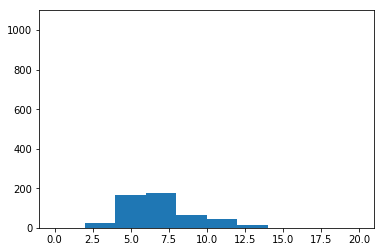

gen257
pop#=483


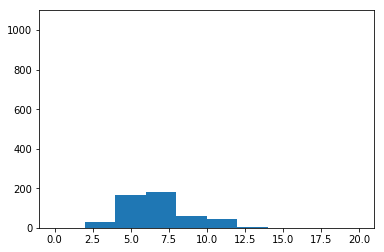

gen258
pop#=456


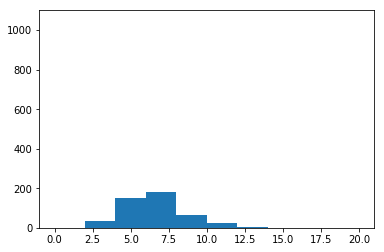

gen259
pop#=465


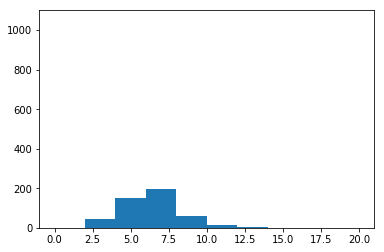

gen260
pop#=509


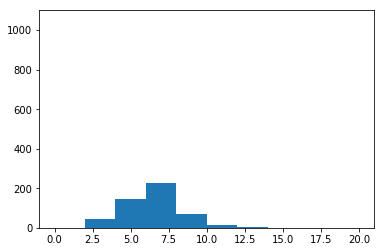

gen261
pop#=475


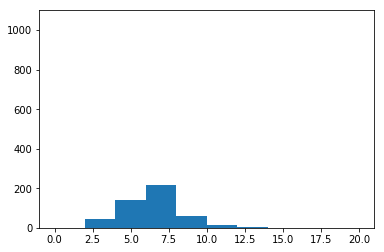

gen262
pop#=480


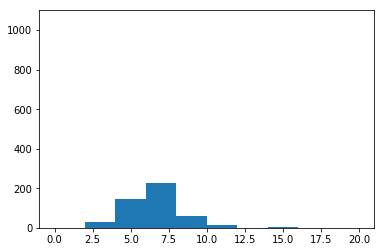

gen263
pop#=441


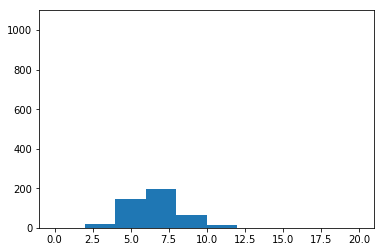

gen264
pop#=452


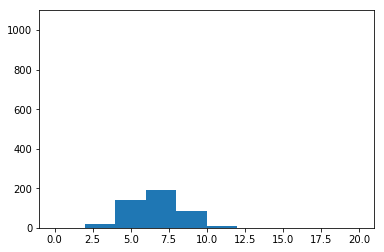

gen265
pop#=452


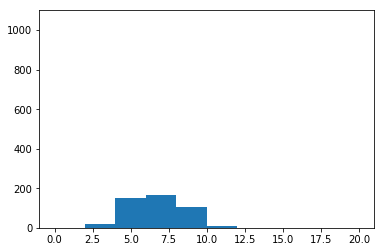

gen266
pop#=486


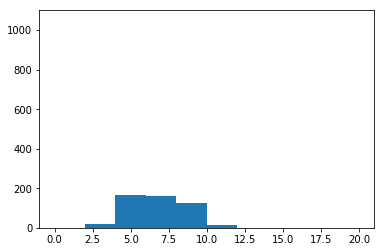

gen267
pop#=493


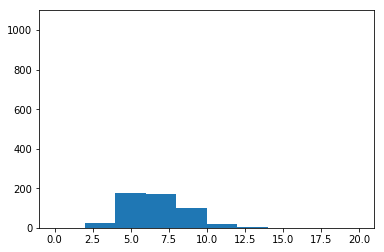

gen268
pop#=508


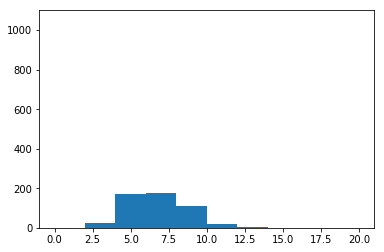

gen269
pop#=522


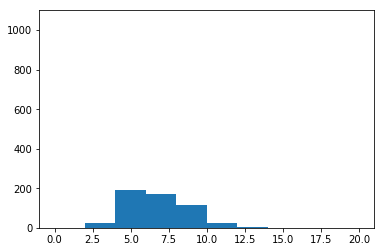

gen270
pop#=513


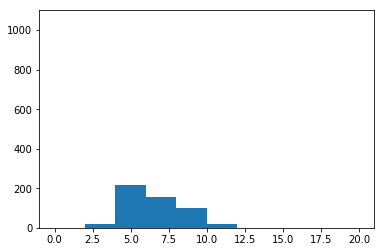

gen271
pop#=495


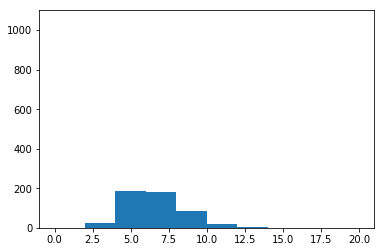

gen272
pop#=466


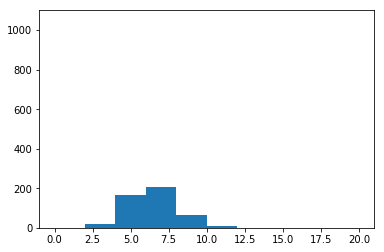

gen273
pop#=445


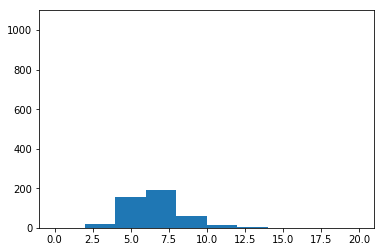

gen274
pop#=425


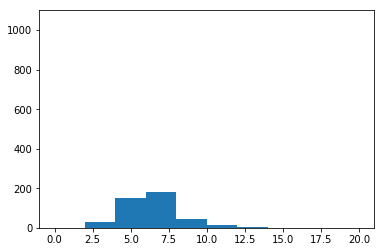

gen275
pop#=414


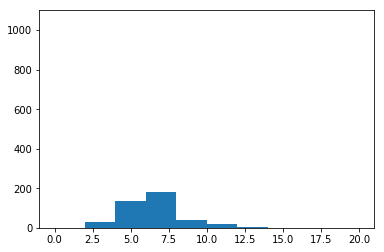

gen276
pop#=436


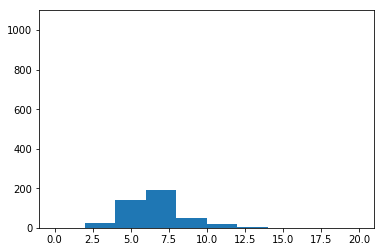

gen277
pop#=434


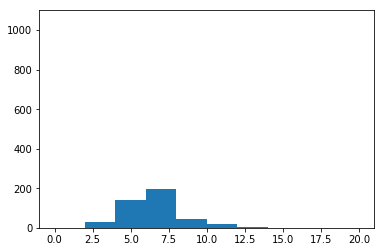

gen278
pop#=469


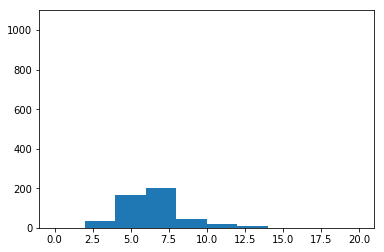

gen279
pop#=454


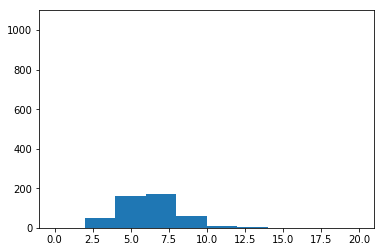

gen280
pop#=478


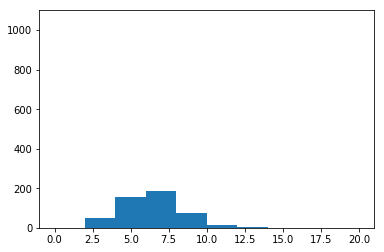

gen281
pop#=494


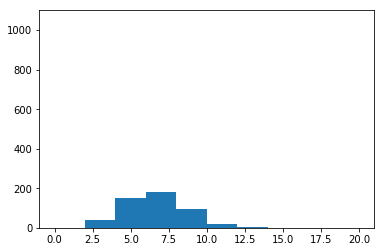

gen282
pop#=460


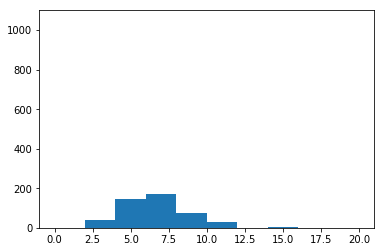

gen283
pop#=474


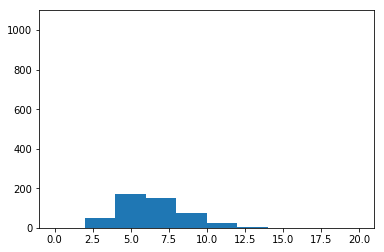

gen284
pop#=507


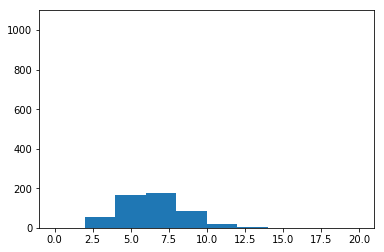

gen285
pop#=495


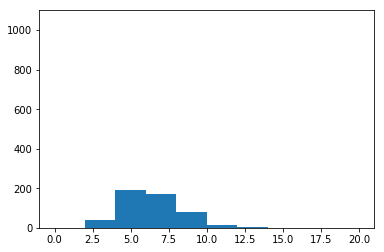

gen286
pop#=487


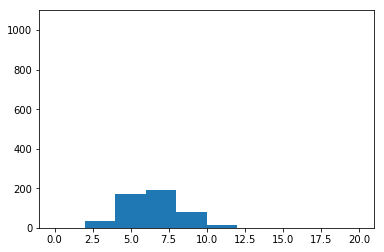

gen287
pop#=478


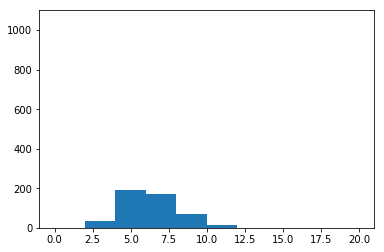

gen288
pop#=468


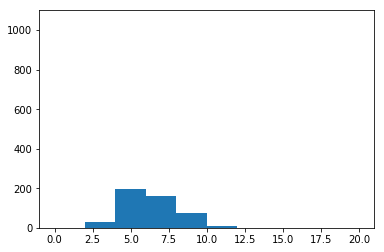

gen289
pop#=476


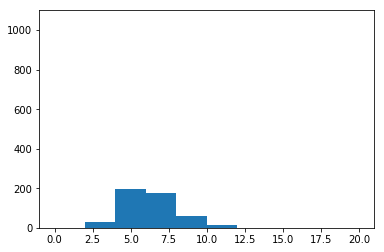

gen290
pop#=499


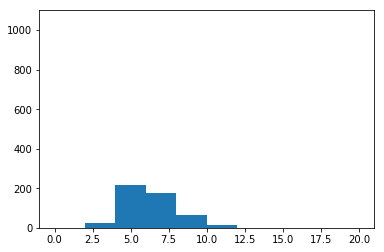

gen291
pop#=437


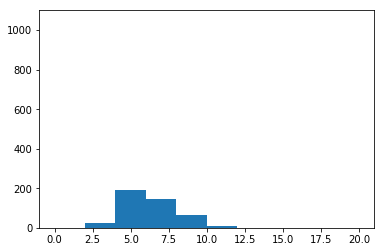

gen292
pop#=437


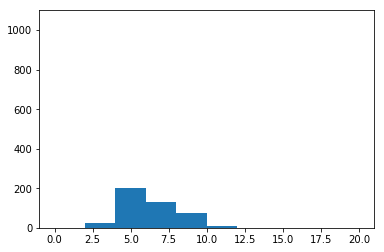

gen293
pop#=475


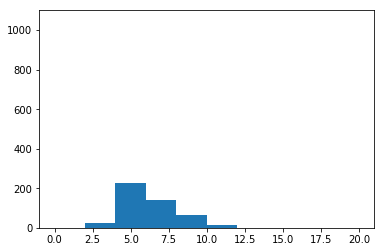

gen294
pop#=499


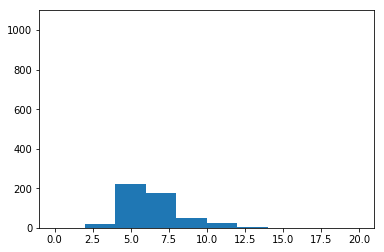

gen295
pop#=452


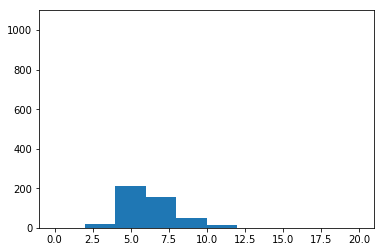

gen296
pop#=481


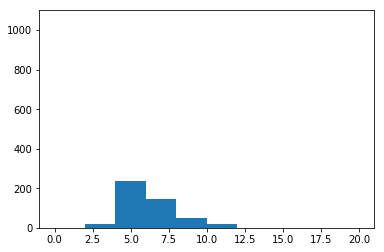

gen297
pop#=495


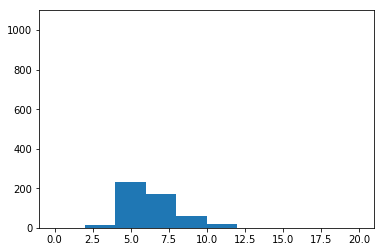

gen298
pop#=497


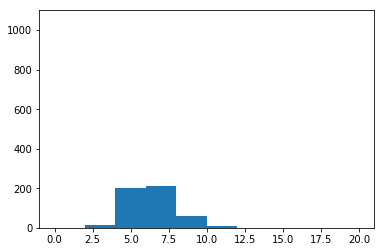

gen299
pop#=526


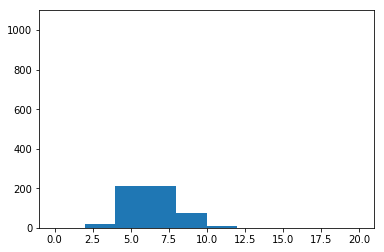

gen300
pop#=487


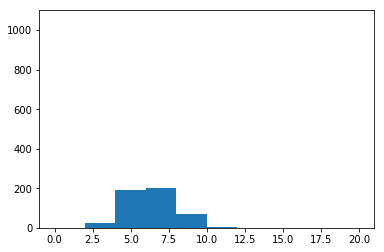

gen301
pop#=516


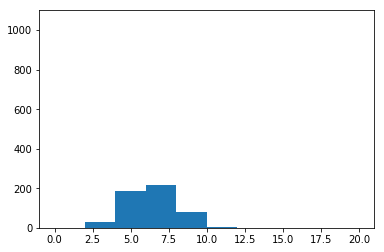

gen302
pop#=524


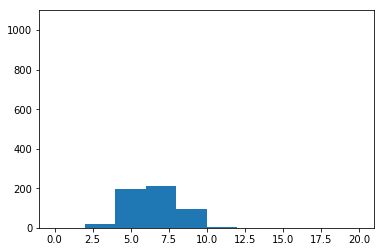

gen303
pop#=529


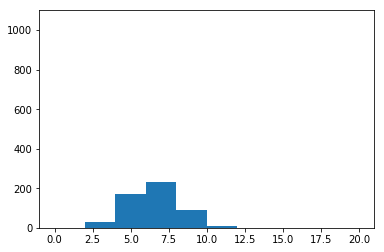

gen304
pop#=526


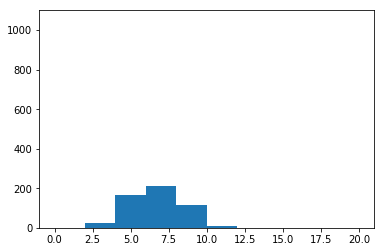

gen305
pop#=498


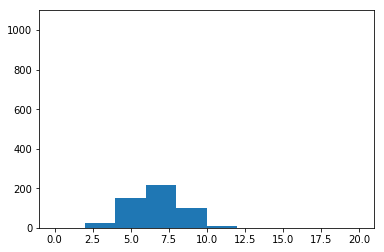

gen306
pop#=517


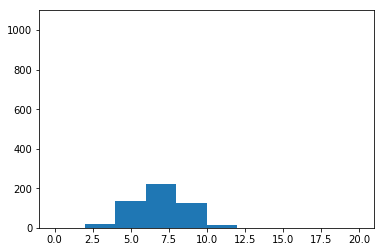

gen307
pop#=455


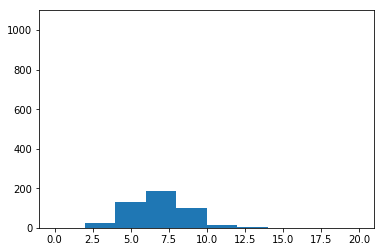

gen308
pop#=469


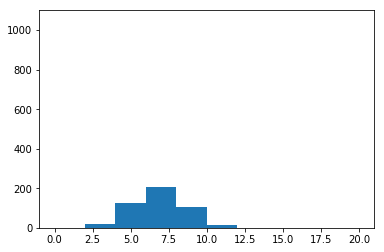

gen309
pop#=461


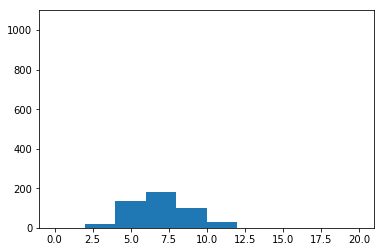

gen310
pop#=428


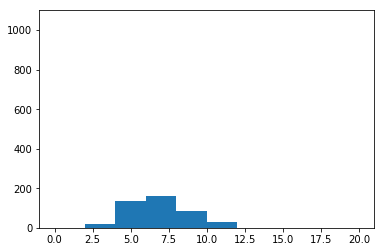

gen311
pop#=425


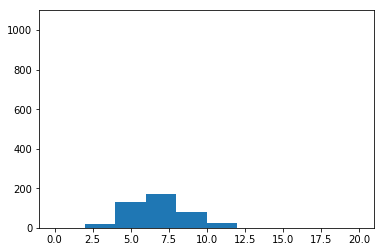

gen312
pop#=399


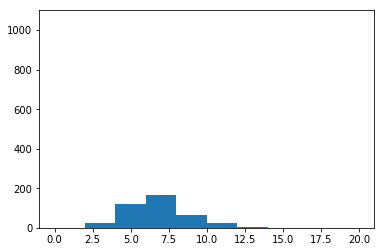

gen313
pop#=445


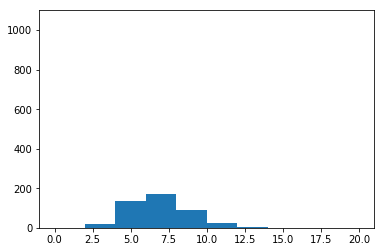

gen314
pop#=406


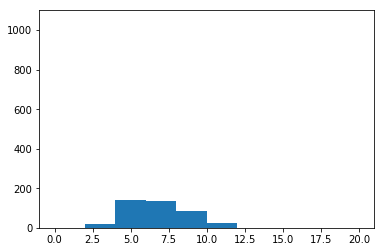

gen315
pop#=450


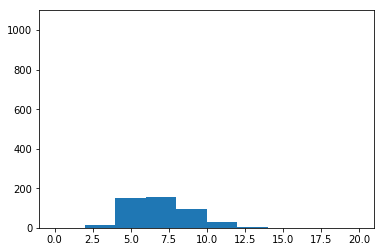

gen316
pop#=458


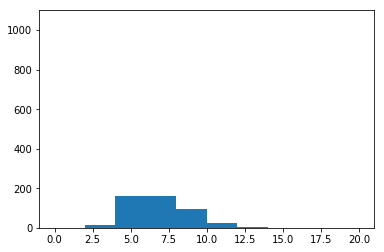

gen317
pop#=454


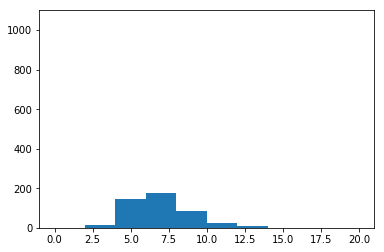

gen318
pop#=446


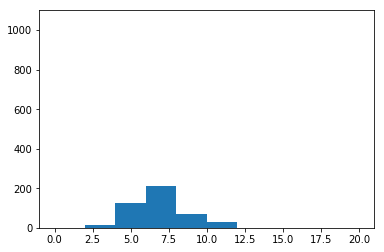

gen319
pop#=490


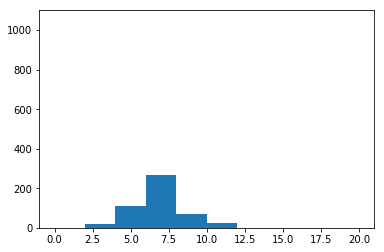

gen320
pop#=485


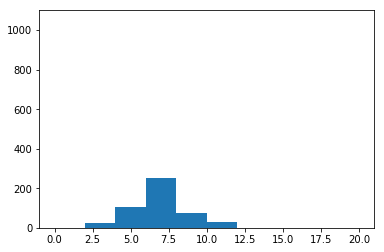

gen321
pop#=472


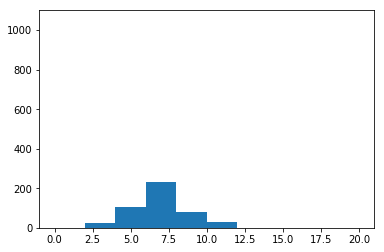

gen322
pop#=447


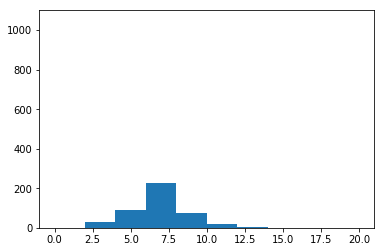

gen323
pop#=419


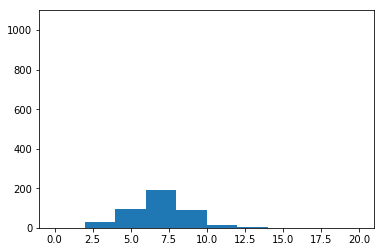

gen324
pop#=416


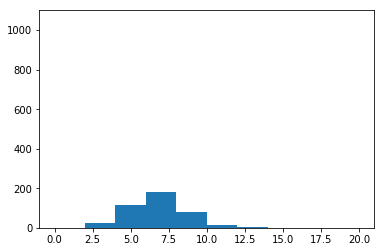

gen325
pop#=407


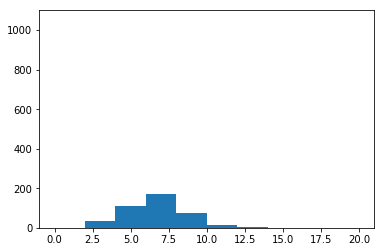

gen326
pop#=392


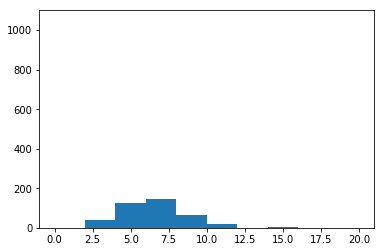

gen327
pop#=404


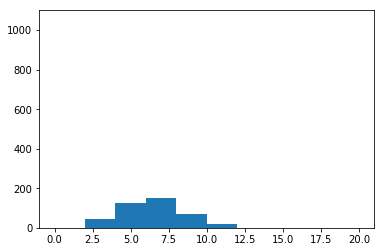

gen328
pop#=415


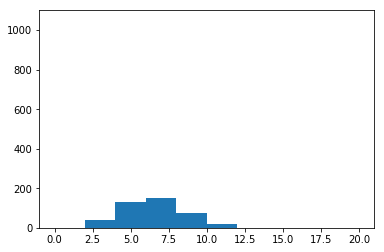

gen329
pop#=448


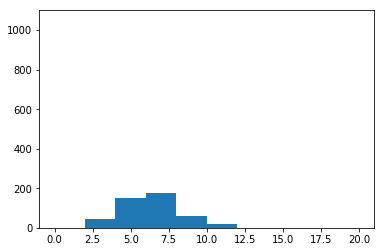

gen330
pop#=486


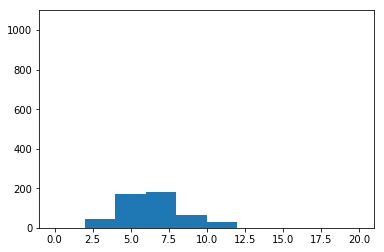

gen331
pop#=501


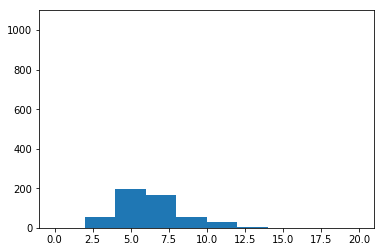

gen332
pop#=485


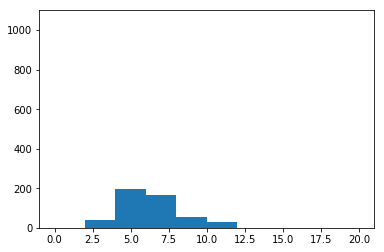

gen333
pop#=515


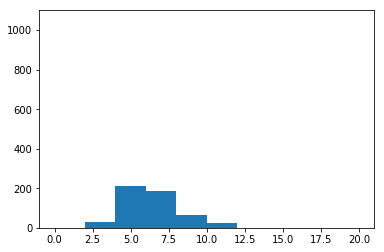

gen334
pop#=535


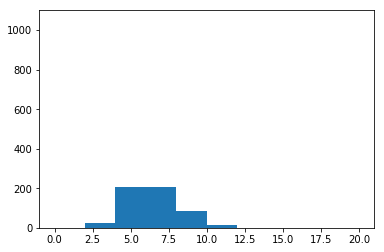

gen335
pop#=510


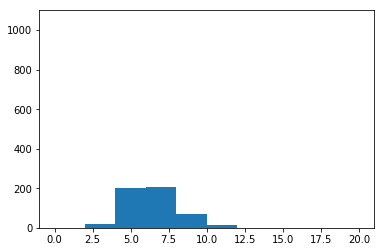

gen336
pop#=539


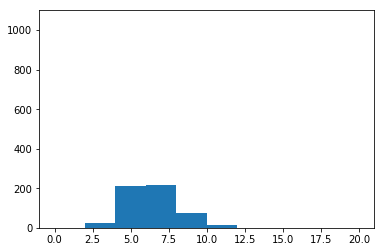

gen337
pop#=525


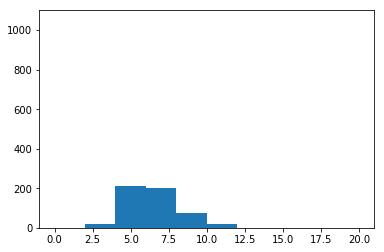

gen338
pop#=541


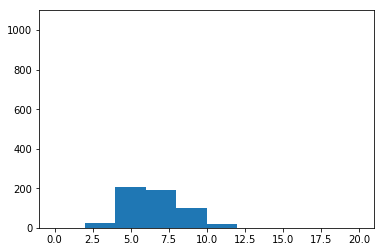

gen339
pop#=512


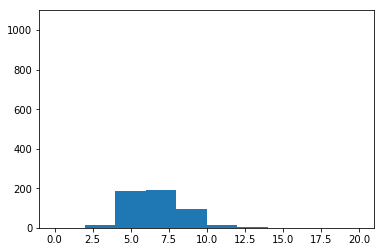

gen340
pop#=495


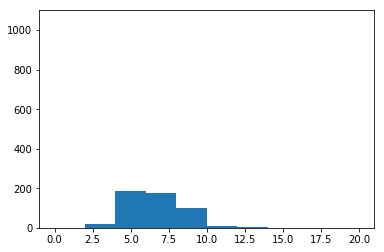

gen341
pop#=492


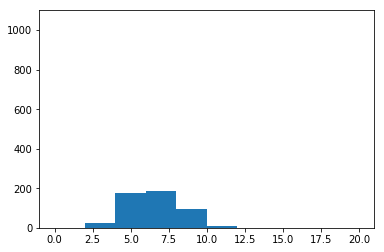

gen342
pop#=480


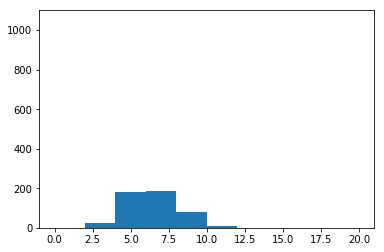

gen343
pop#=501


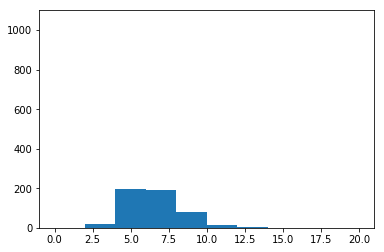

gen344
pop#=513


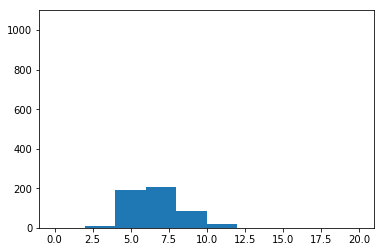

gen345
pop#=501


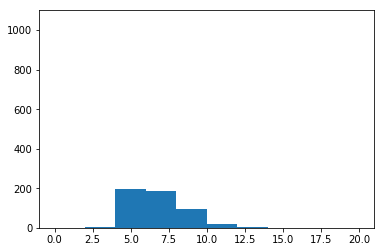

gen346
pop#=430


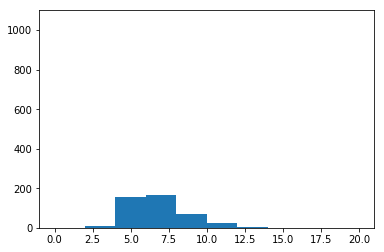

gen347
pop#=447


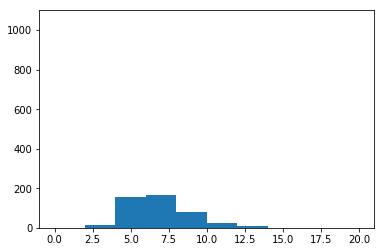

gen348
pop#=449


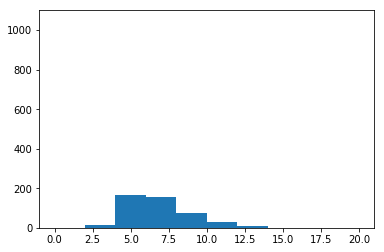

gen349
pop#=459


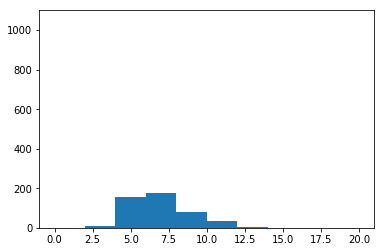

gen350
pop#=414


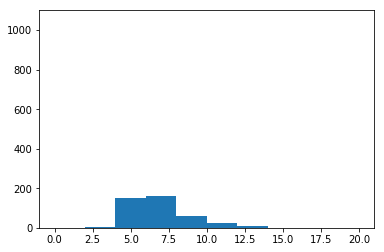

gen351
pop#=447


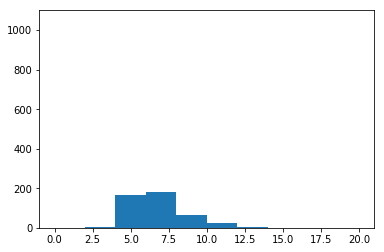

gen352
pop#=448


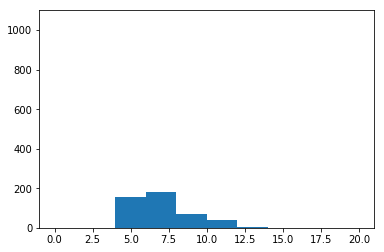

gen353
pop#=460


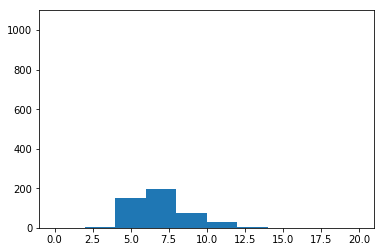

gen354
pop#=463


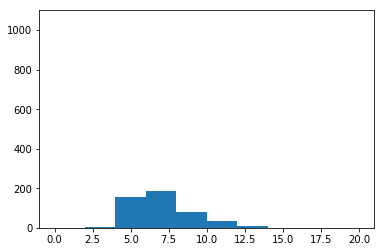

gen355
pop#=442


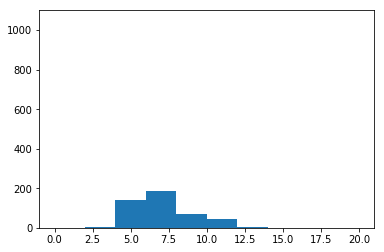

gen356
pop#=457


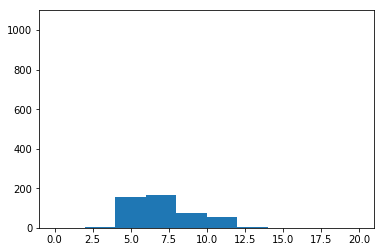

gen357
pop#=452


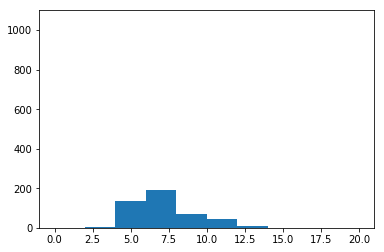

gen358
pop#=456


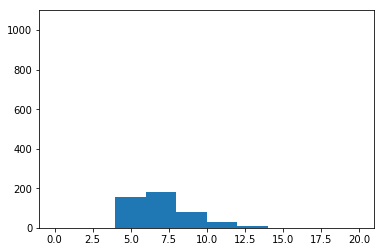

gen359
pop#=469


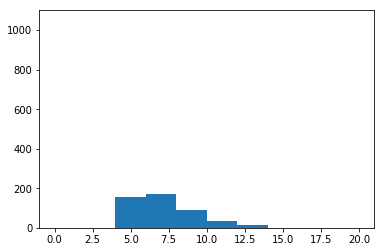

gen360
pop#=425


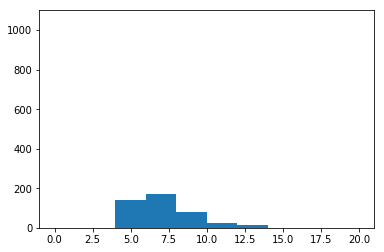

gen361
pop#=426


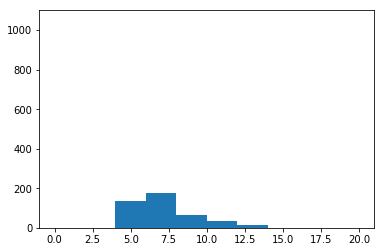

gen362
pop#=423


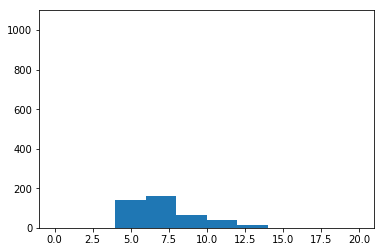

gen363
pop#=416


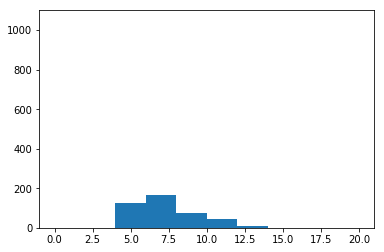

gen364
pop#=402


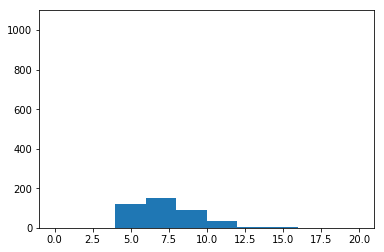

gen365
pop#=419


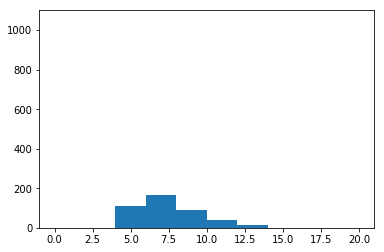

gen366
pop#=444


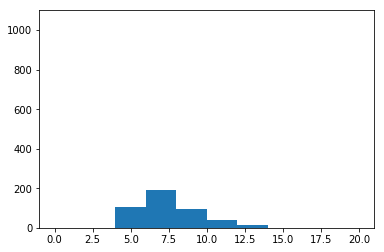

gen367
pop#=445


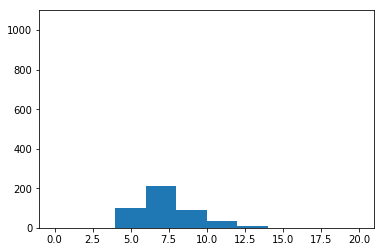

gen368
pop#=416


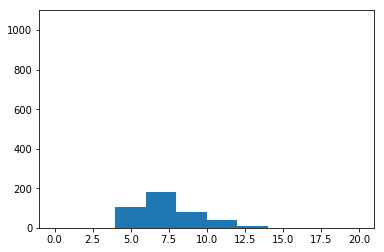

gen369
pop#=446


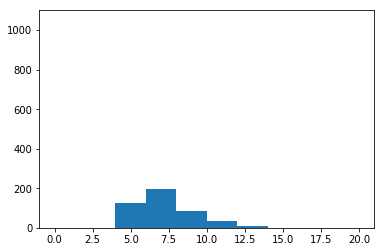

gen370
pop#=440


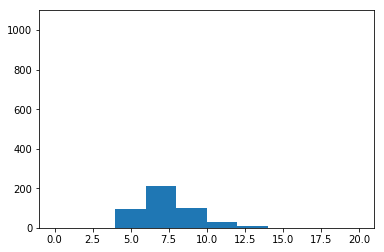

gen371
pop#=410


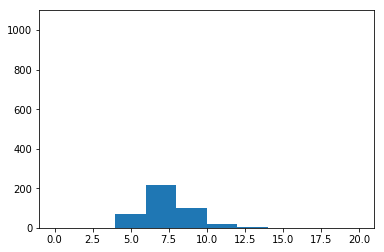

gen372
pop#=372


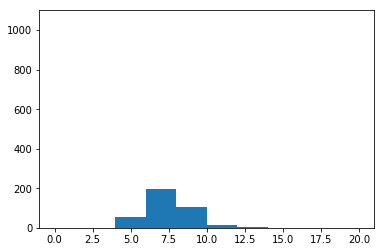

gen373
pop#=403


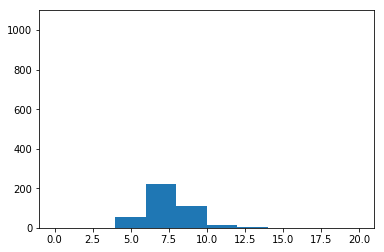

gen374
pop#=380


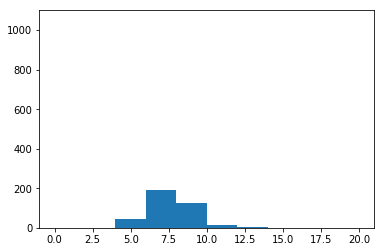

gen375
pop#=372


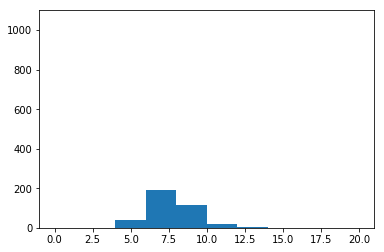

gen376
pop#=401


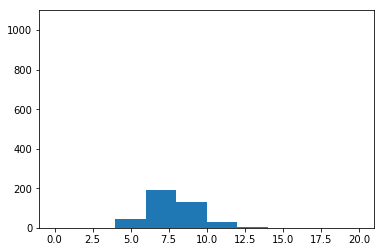

gen377
pop#=377


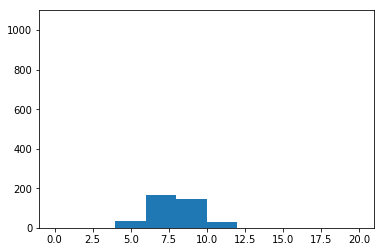

gen378
pop#=399


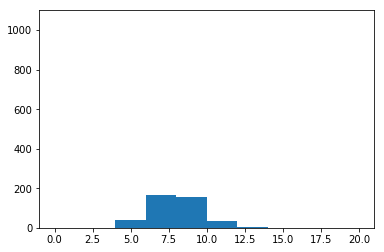

gen379
pop#=394


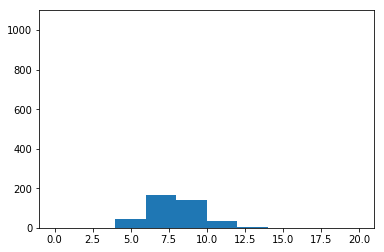

gen380
pop#=407


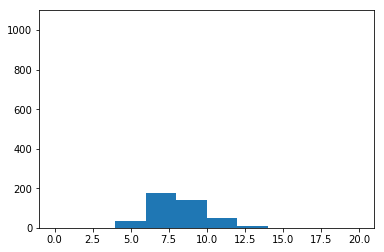

gen381
pop#=408


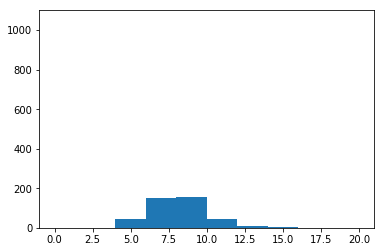

gen382
pop#=397


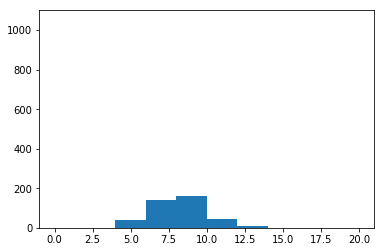

gen383
pop#=370


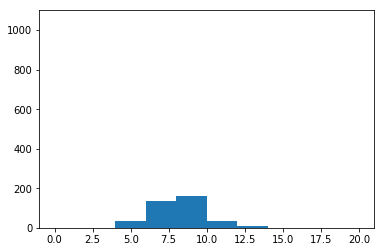

gen384
pop#=363


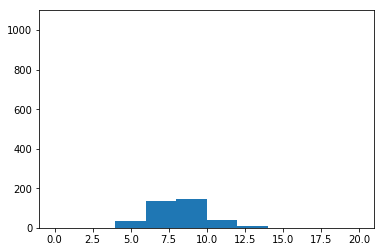

gen385
pop#=327


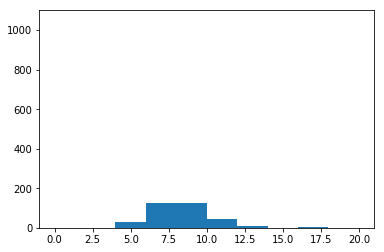

gen386
pop#=350


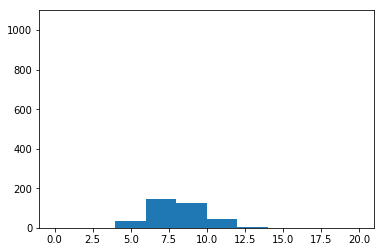

gen387
pop#=380


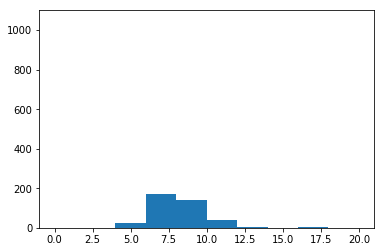

gen388
pop#=364


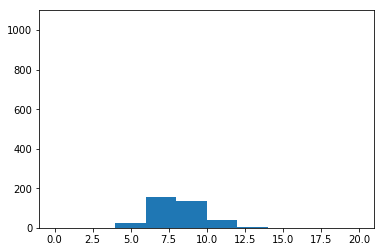

gen389
pop#=329


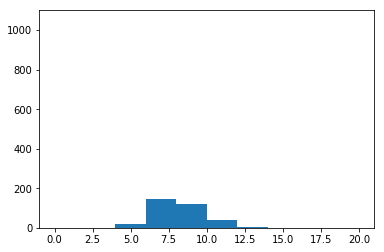

gen390
pop#=323


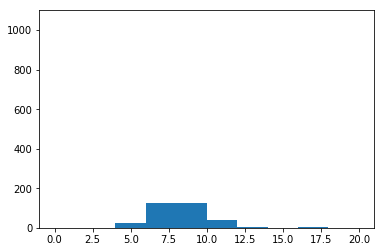

gen391
pop#=351


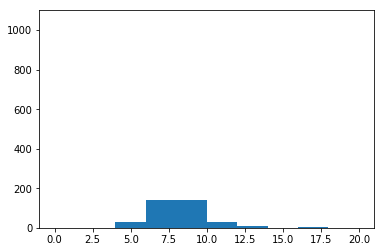

gen392
pop#=362


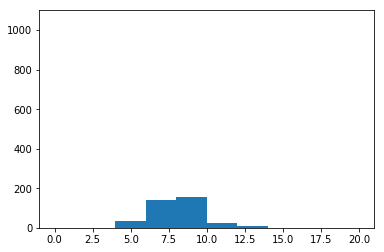

gen393
pop#=345


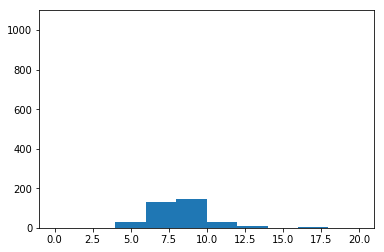

gen394
pop#=338


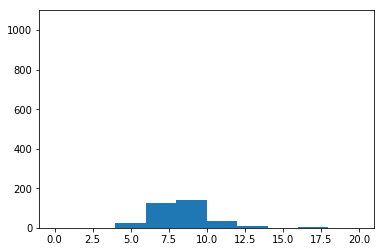

gen395
pop#=342


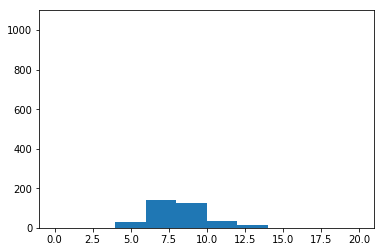

gen396
pop#=352


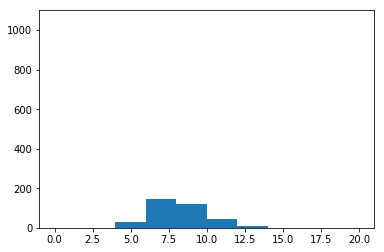

gen397
pop#=365


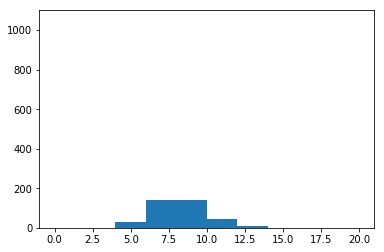

gen398
pop#=361


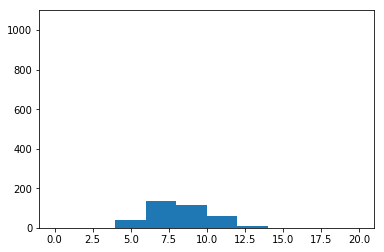

gen399
pop#=331


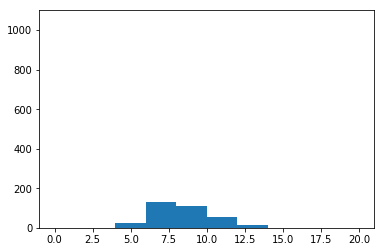

gen400
pop#=317


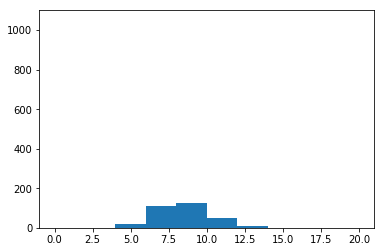

gen401
pop#=328


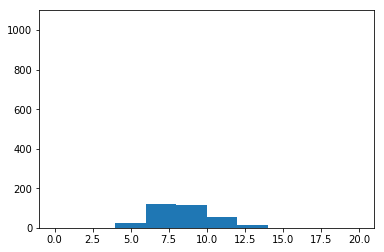

gen402
pop#=319


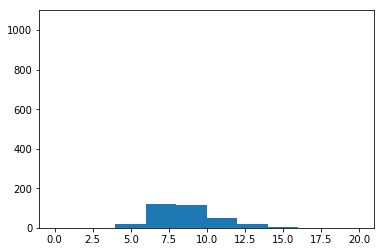

gen403
pop#=346


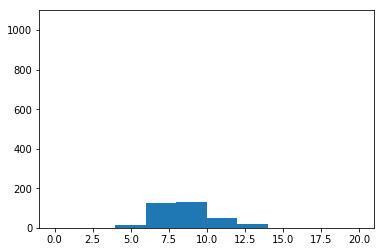

gen404
pop#=328


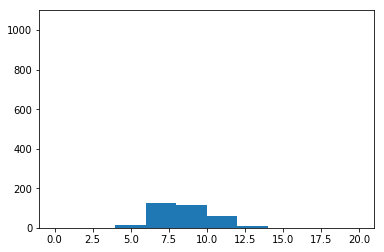

gen405
pop#=303


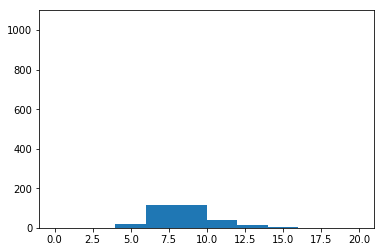

gen406
pop#=313


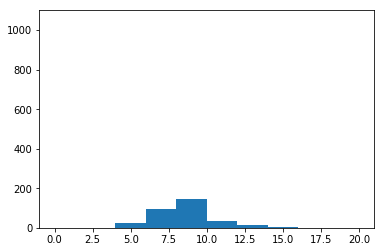

gen407
pop#=287


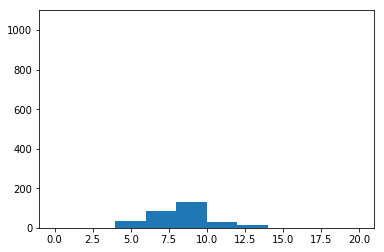

gen408
pop#=293


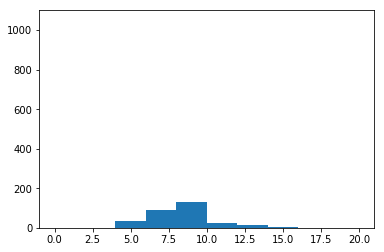

gen409
pop#=310


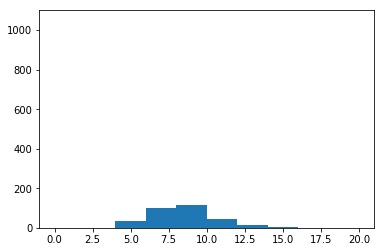

gen410
pop#=304


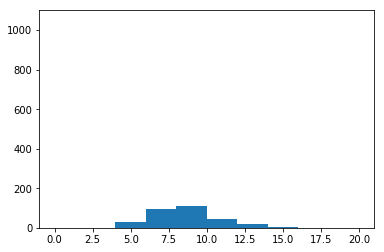

gen411
pop#=299


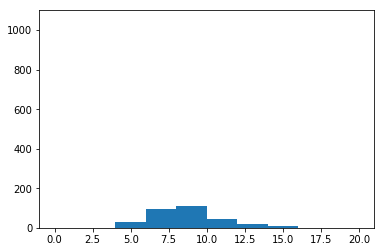

gen412
pop#=298


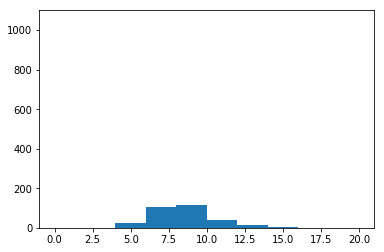

gen413
pop#=307


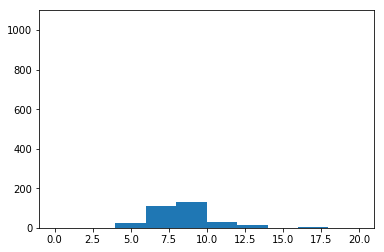

gen414
pop#=313


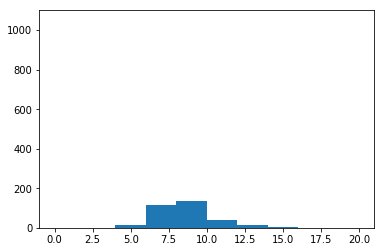

gen415
pop#=311


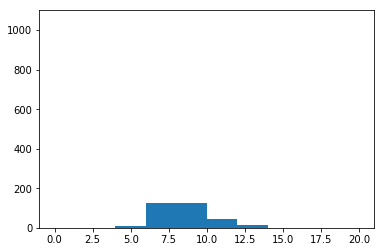

gen416
pop#=297


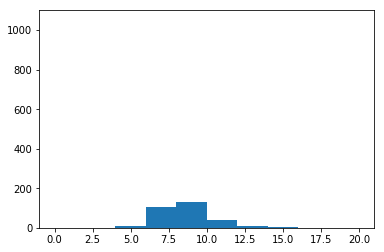

gen417
pop#=319


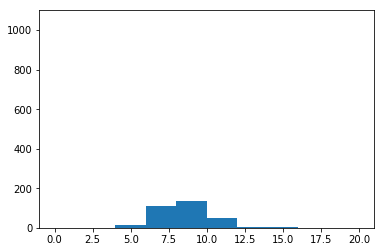

gen418
pop#=331


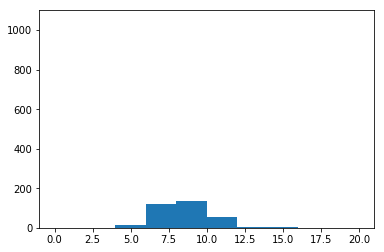

gen419
pop#=301


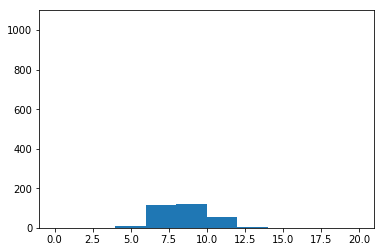

gen420
pop#=296


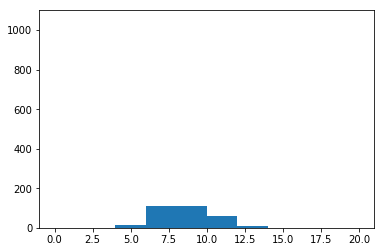

gen421
pop#=340


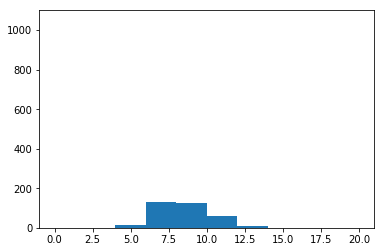

gen422
pop#=337


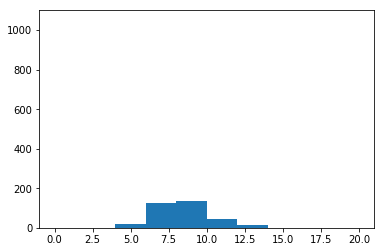

gen423
pop#=327


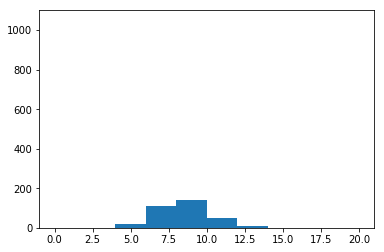

gen424
pop#=323


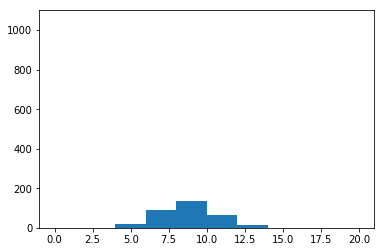

gen425
pop#=336


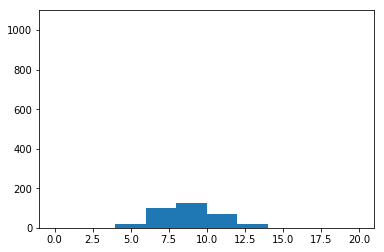

gen426
pop#=324


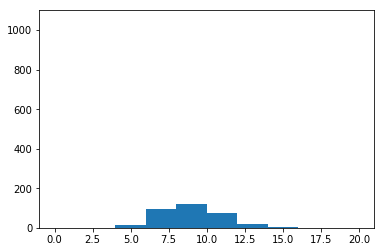

gen427
pop#=311


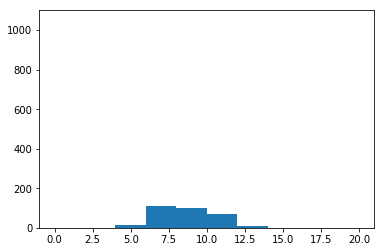

gen428
pop#=315


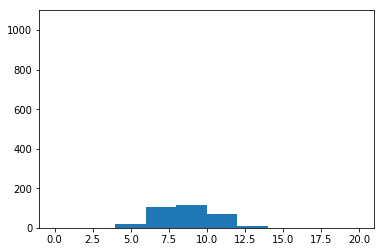

gen429
pop#=287


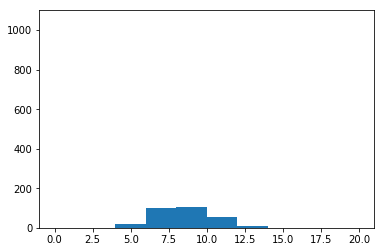

gen430
pop#=297


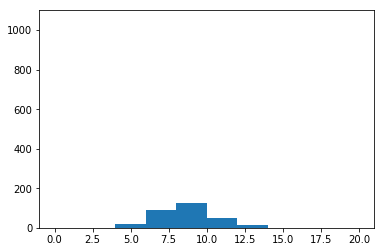

gen431
pop#=336


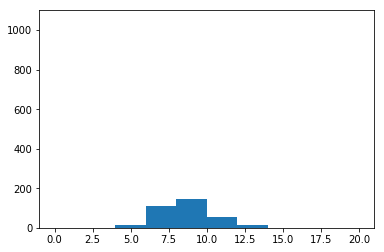

gen432
pop#=353


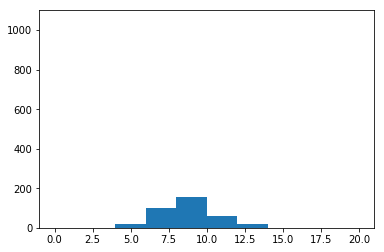

gen433
pop#=355


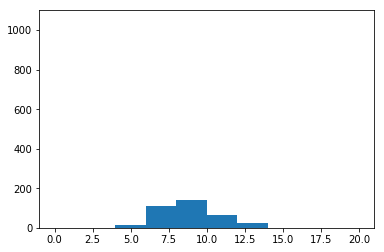

gen434
pop#=328


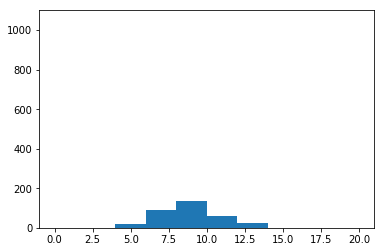

gen435
pop#=316


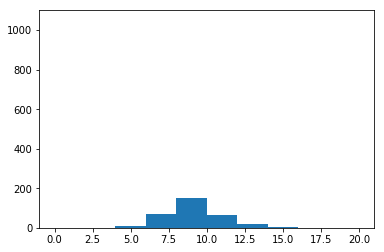

gen436
pop#=300


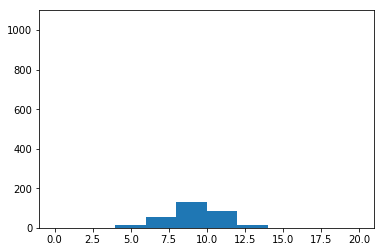

gen437
pop#=296


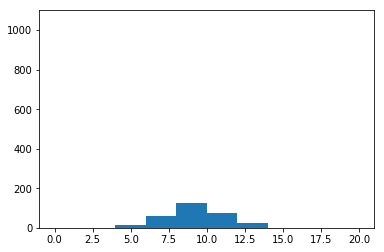

gen438
pop#=297


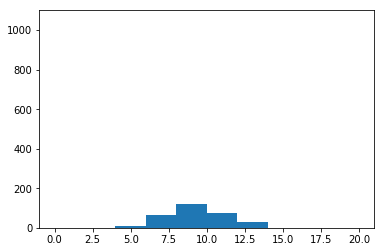

gen439
pop#=308


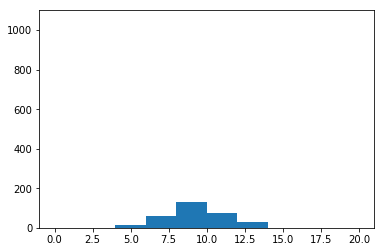

gen440
pop#=320


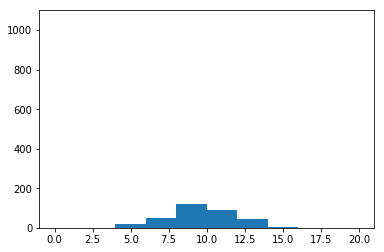

gen441
pop#=295


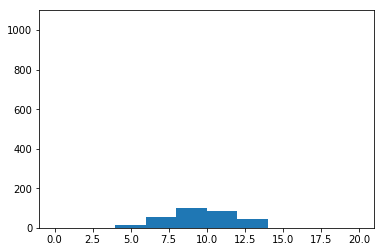

gen442
pop#=340


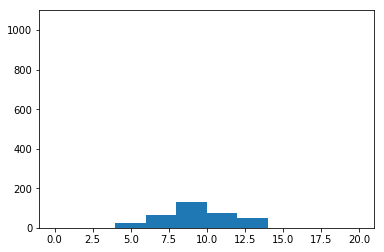

gen443
pop#=356


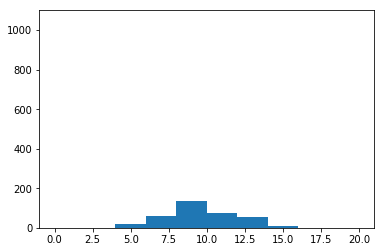

gen444
pop#=350


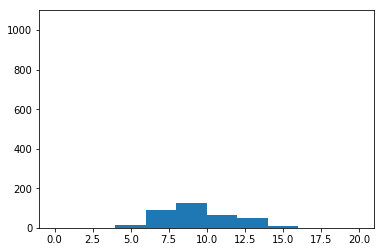

gen445
pop#=296


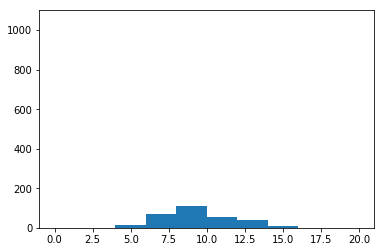

gen446
pop#=291


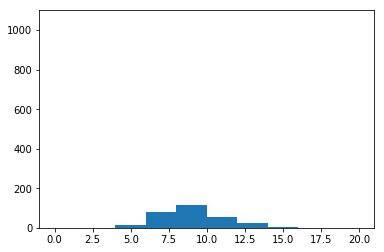

gen447
pop#=333


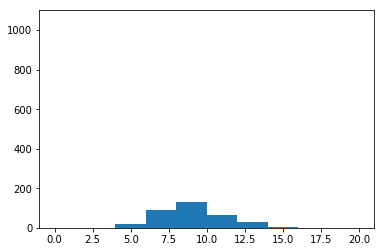

gen448
pop#=314


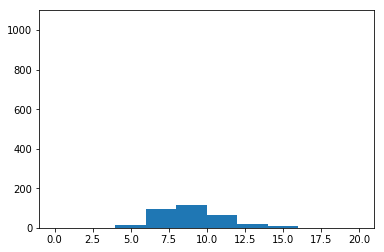

gen449
pop#=277


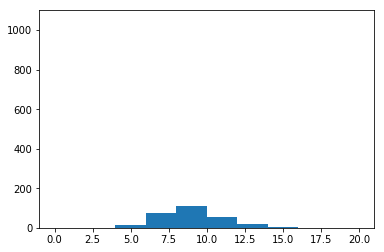

gen450
pop#=300


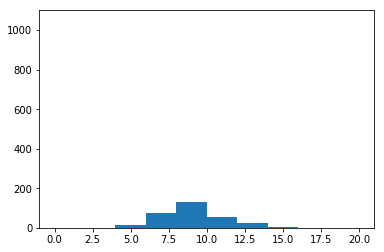

gen451
pop#=282


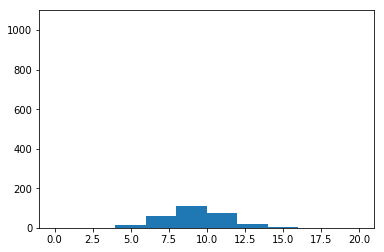

gen452
pop#=313


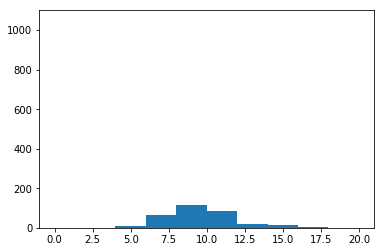

gen453
pop#=318


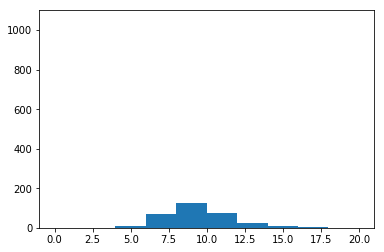

gen454
pop#=293


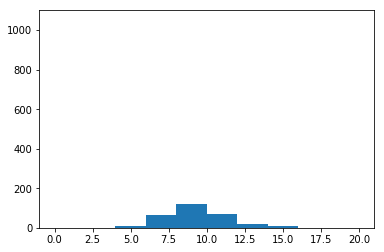

gen455
pop#=296


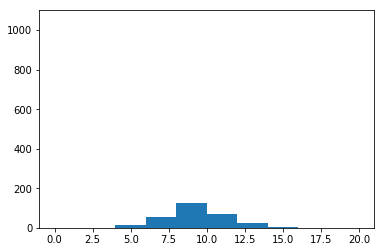

gen456
pop#=298


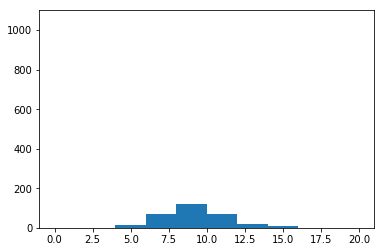

gen457
pop#=286


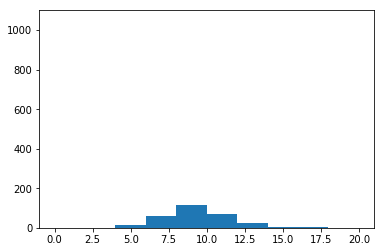

gen458
pop#=292


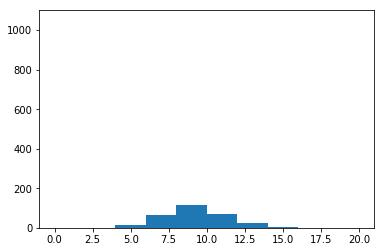

gen459
pop#=312


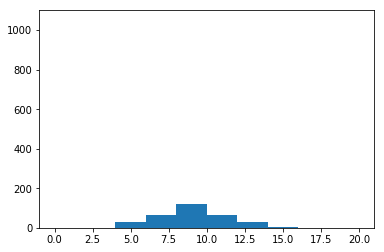

gen460
pop#=302


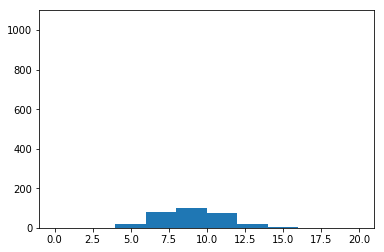

gen461
pop#=305


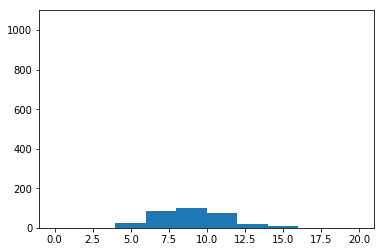

gen462
pop#=309


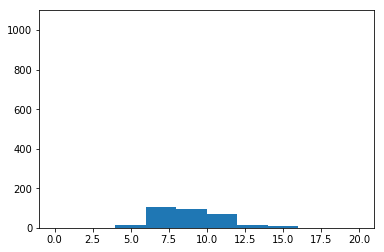

gen463
pop#=284


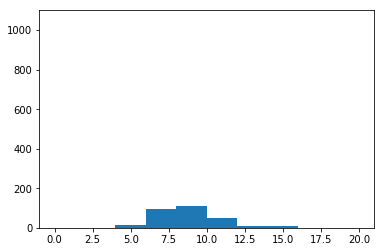

gen464
pop#=304


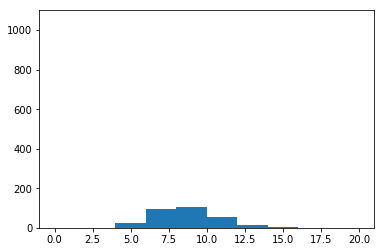

gen465
pop#=308


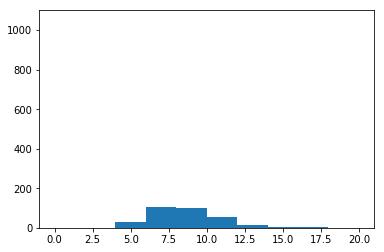

gen466
pop#=320


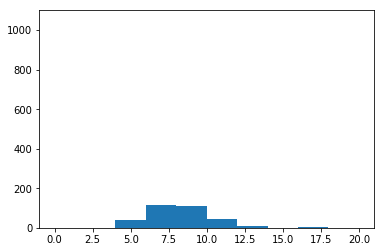

gen467
pop#=338


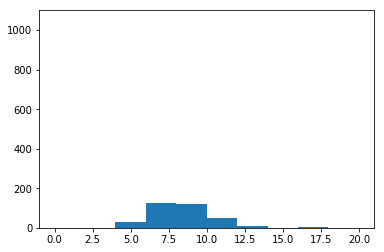

gen468
pop#=373


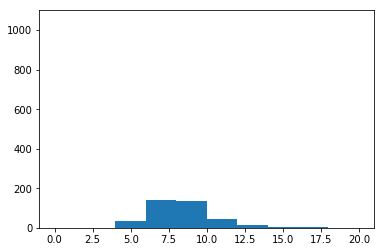

gen469
pop#=364


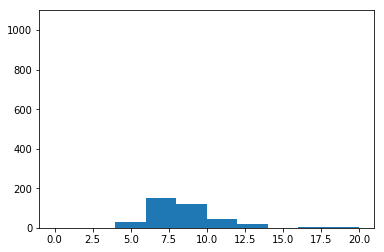

gen470
pop#=355


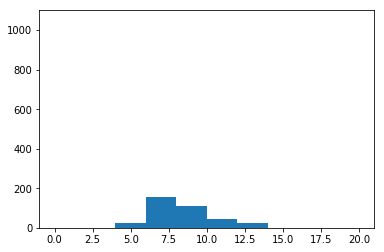

gen471
pop#=344


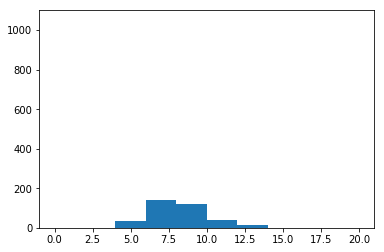

gen472
pop#=354


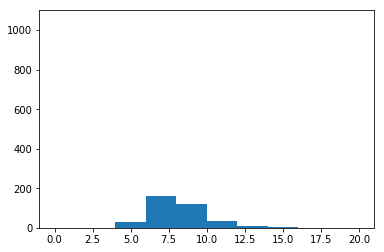

gen473
pop#=369


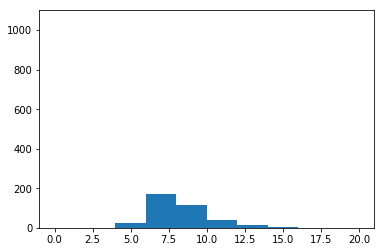

gen474
pop#=370


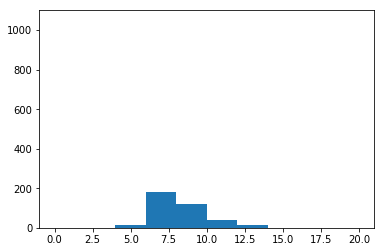

gen475
pop#=353


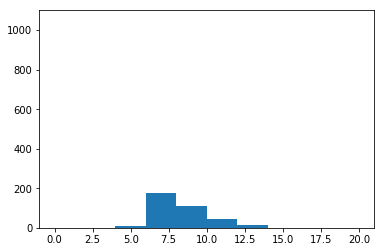

gen476
pop#=326


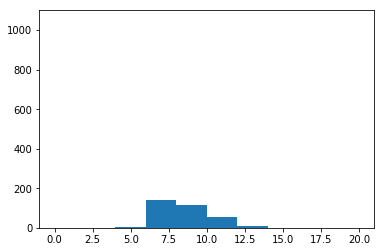

gen477
pop#=336


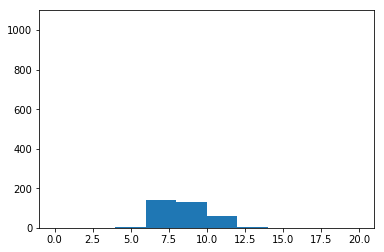

gen478
pop#=354


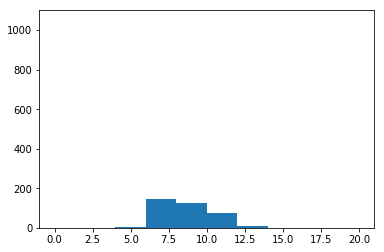

gen479
pop#=332


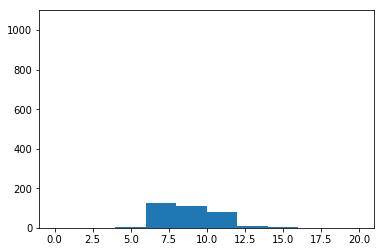

gen480
pop#=311


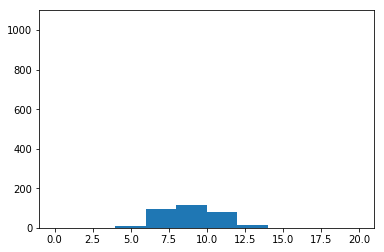

gen481
pop#=311


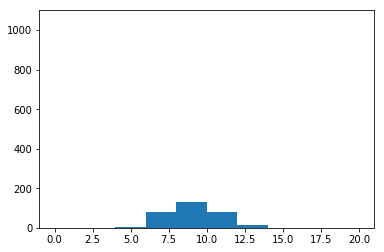

gen482
pop#=329


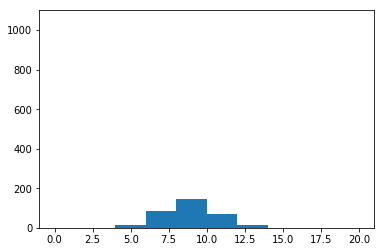

gen483
pop#=344


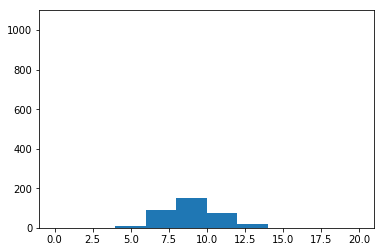

gen484
pop#=302


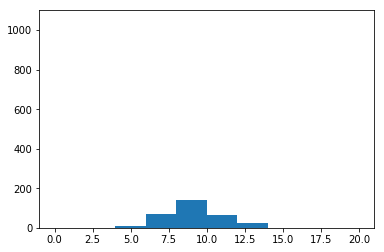

gen485
pop#=326


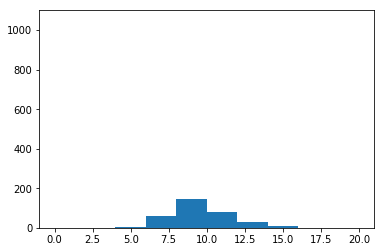

gen486
pop#=286


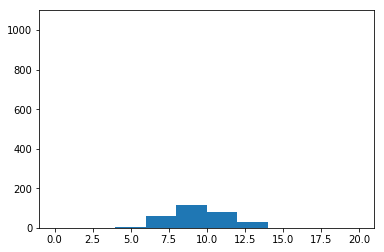

gen487
pop#=285


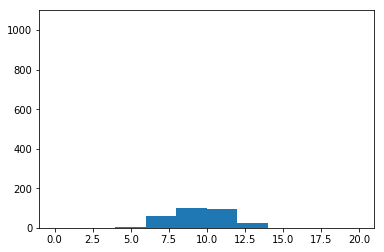

gen488
pop#=269


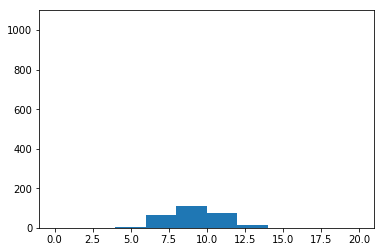

gen489
pop#=255


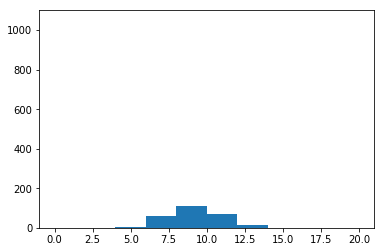

gen490
pop#=257


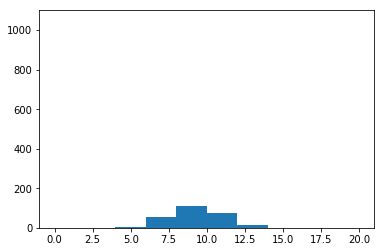

gen491
pop#=239


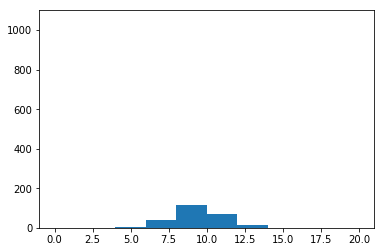

gen492
pop#=231


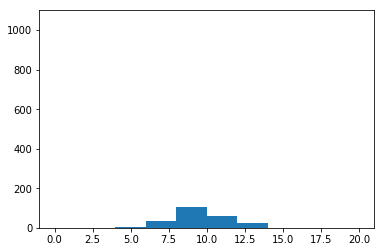

gen493
pop#=241


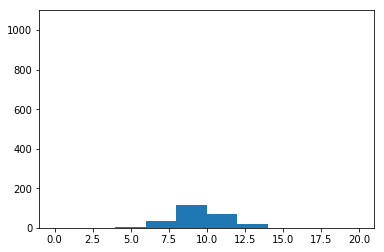

gen494
pop#=272


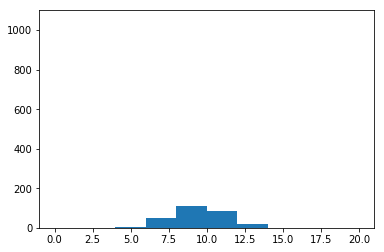

gen495
pop#=278


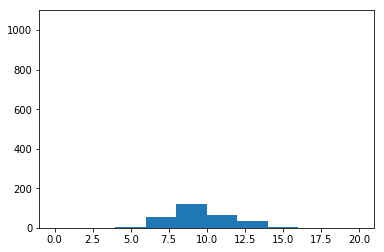

gen496
pop#=263


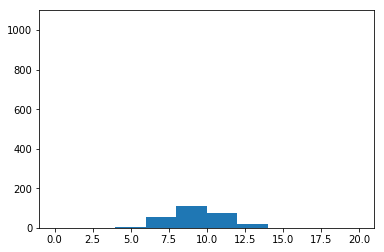

gen497
pop#=250


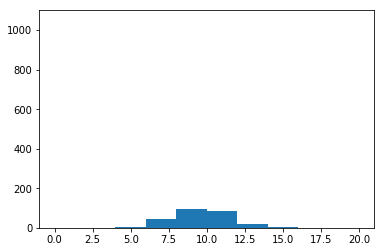

gen498
pop#=272


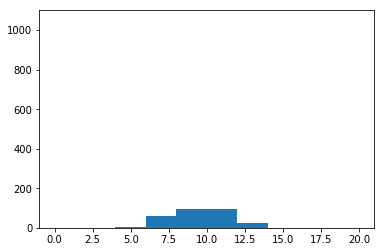

gen499
pop#=305


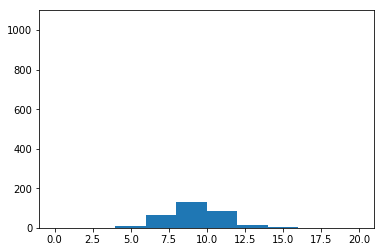

gen500
pop#=314


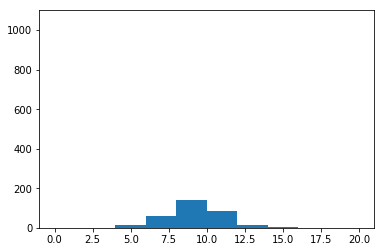

gen501
pop#=317


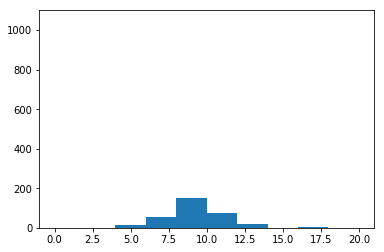